Data fetched successfully from STRING API.
   preferredName_A preferredName_B  score
88           TOP2A          NUSAP1  0.999
30             LEP          ADIPOQ  0.994
87          ADIPOQ             CFD  0.988
12           KIF11           CDC20  0.987
69           CDC20           TOP2A  0.980


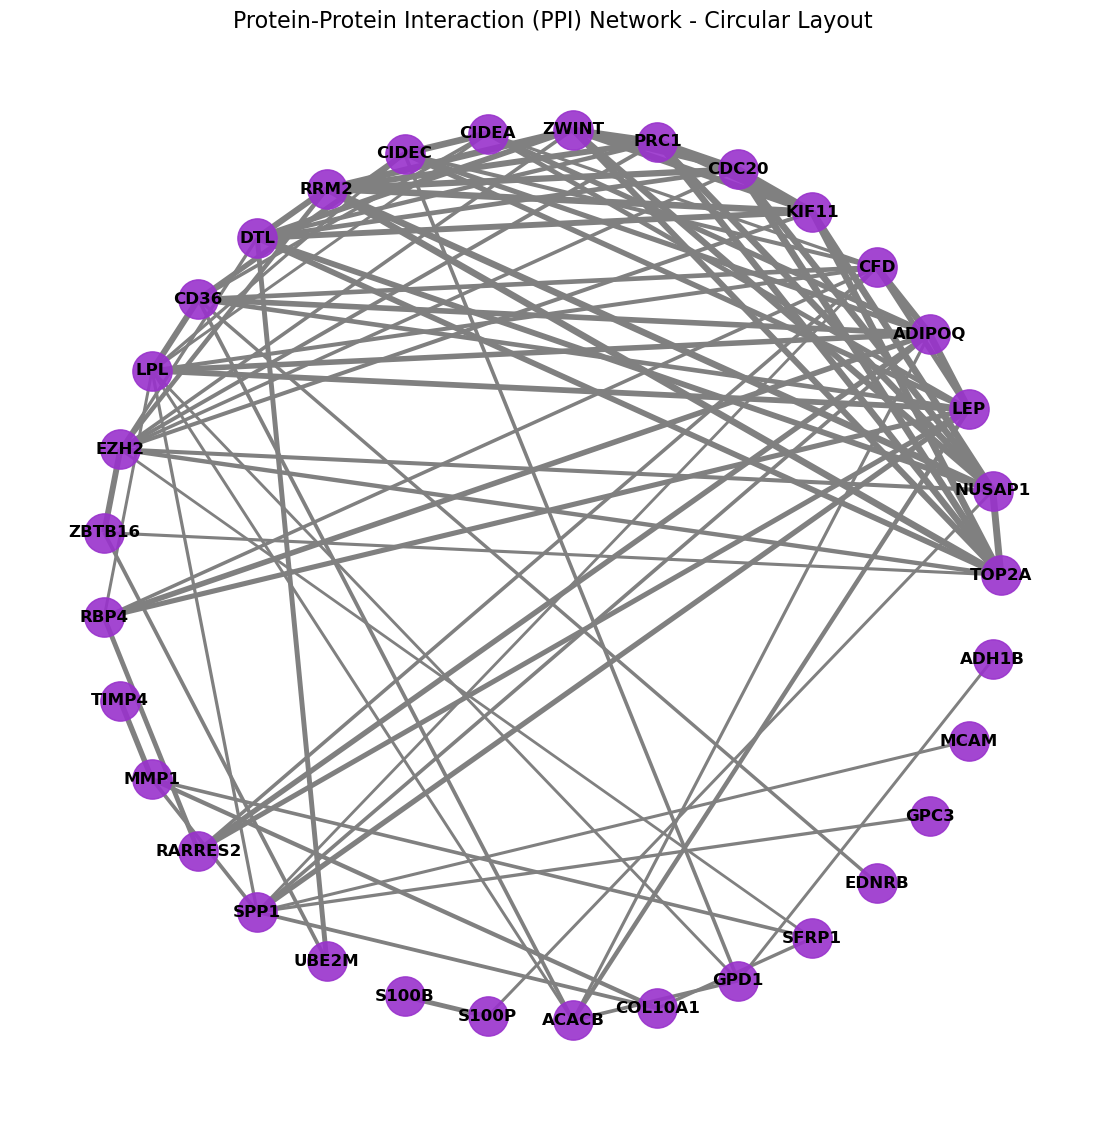

In [21]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of selected genes from the paper
selected_genes = [
    "TOP2A", "EZH2", "SPP1", "MMP1", "EDNRB", "S100B", "ZWINT", "PRC1", "DTL", "CDC20",
    "SFRP1", "CD36", "ADIPOQ", "LEP", "LPL", "CFD", "RARRES2", "CIDEA", "CIDEC", "GPD1",
    "RBP4", "S100P", "ACACB", "GPC3", "ZBTB16", "ITIH5", "ADH1B", "COL10A1", "MATN2",
    "TIMP4", "MCAM", "UBE2M", "RRM2", "KIF11", "NUSAP1"
]

# Define STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

# Parameters for API request
params = {
    "identifiers": "%0d".join(selected_genes),  # Join genes with newlines for the API request
    "species": 9606,                            # Human species
    "network_type": "functional",               # Functional associations
    "required_score": 400,                      # Confidence threshold (400 = medium confidence)
    "caller_identity": "python_script"
}

# Send request to STRING API
response = requests.get(STRING_API_URL, params=params)

# Check response
if response.status_code == 200:
    interactions = response.json()
    print("Data fetched successfully from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert API response into a DataFrame and display top interactions
if interactions:
    df = pd.DataFrame(interactions)
    # Keep only columns of interest
    df = df[['preferredName_A', 'preferredName_B', 'score']]  
    # Sort by confidence score (descending)
    df = df.sort_values(by='score', ascending=False)
    print(df.head())  # Display top few interactions
else:
    print("No interactions found.")
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Create a graph from interaction data
G = nx.Graph()

# Add edges from STRING interactions with weights
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Compute a circular layout for the graph
pos = nx.circular_layout(G)

# Scale edge thickness to be extremely thick (multiplying by 20)
edge_weights = [(G[u][v]['weight'] / 100) * 500 for u, v in G.edges()]

# Fixed node size
node_size = 800  

# Draw the circular network
plt.figure(figsize=(14, 14))

# Draw nodes
nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=node_size, 
    node_color="darkorchid", 
    alpha=0.9
)

# Draw labels
nx.draw_networkx_labels(
    G, 
    pos, 
    font_size=12, 
    font_weight="bold", 
    font_color="black"
)

# Draw edges with a thick width and a lighter color (gray)
nx.draw_networkx_edges(
    G, 
    pos, 
    width=edge_weights, 
    edge_color="gray", 
    alpha=1.0
)

plt.title("Protein-Protein Interaction (PPI) Network - Circular Layout", fontsize=16)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()


Data fetched successfully from STRING API.
TOP2A - NUSAP1: 0.999
LEP - ADIPOQ: 0.994
ADIPOQ - CFD: 0.988
KIF11 - CDC20: 0.987
CDC20 - TOP2A: 0.98
KIF11 - TOP2A: 0.975
KIF11 - NUSAP1: 0.974
KIF11 - PRC1: 0.972
CDC20 - ZWINT: 0.968
CIDEA - CIDEC: 0.958
RRM2 - TOP2A: 0.956
RRM2 - NUSAP1: 0.951
CDC20 - PRC1: 0.947
KIF11 - RRM2: 0.947
CDC20 - NUSAP1: 0.946
RRM2 - ZWINT: 0.942
PRC1 - NUSAP1: 0.936
PRC1 - TOP2A: 0.932
KIF11 - ZWINT: 0.928
RRM2 - CDC20: 0.907
ZWINT - NUSAP1: 0.902
RRM2 - DTL: 0.88
CD36 - LPL: 0.877
ZWINT - TOP2A: 0.875
RRM2 - PRC1: 0.868
EZH2 - ZBTB16: 0.852
KIF11 - DTL: 0.85
DTL - NUSAP1: 0.834
LEP - LPL: 0.828
ZWINT - PRC1: 0.825
DTL - TOP2A: 0.822
DTL - ZWINT: 0.819
ADIPOQ - CD36: 0.806
RBP4 - ADIPOQ: 0.799
ADIPOQ - LPL: 0.794
TIMP4 - MMP1: 0.784
LEP - CIDEC: 0.773
ADIPOQ - RARRES2: 0.773
LEP - CFD: 0.769
LEP - SPP1: 0.764
CIDEA - ADIPOQ: 0.763
CIDEC - CD36: 0.759
CIDEC - ADIPOQ: 0.743
LEP - RBP4: 0.741
LEP - RARRES2: 0.725
UBE2M - DTL: 0.71
S100B - S100P: 0.698
RBP4 - RARR

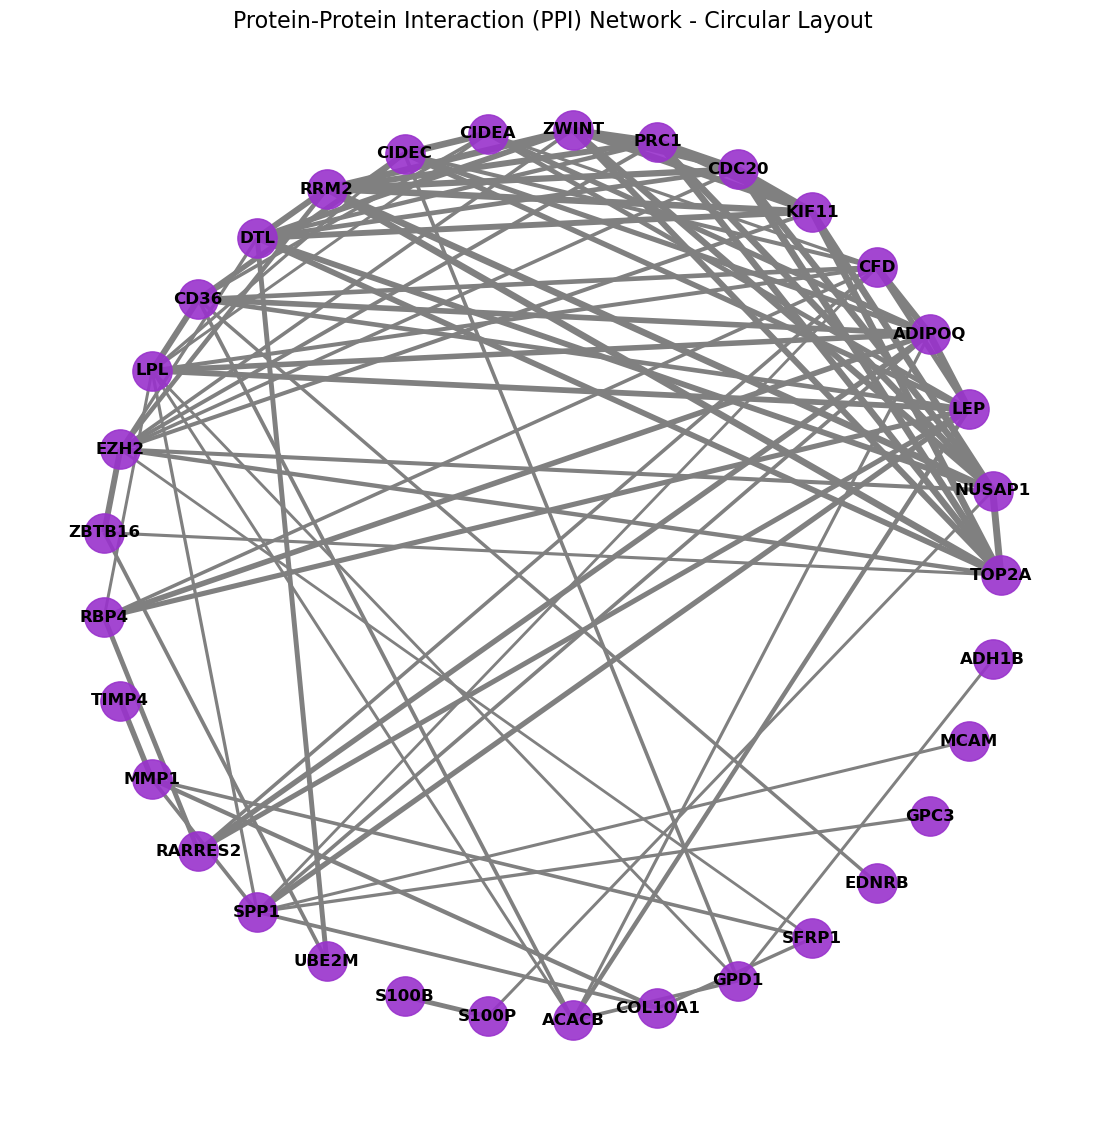

In [23]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of selected genes
selected_genes = [
    "TOP2A", "EZH2", "SPP1", "MMP1", "EDNRB", "S100B", "ZWINT", "PRC1", "DTL", "CDC20",
    "SFRP1", "CD36", "ADIPOQ", "LEP", "LPL", "CFD", "RARRES2", "CIDEA", "CIDEC", "GPD1",
    "RBP4", "S100P", "ACACB", "GPC3", "ZBTB16", "ITIH5", "ADH1B", "COL10A1", "MATN2",
    "TIMP4", "MCAM", "UBE2M", "RRM2", "KIF11", "NUSAP1"
]

# Define STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

# Parameters for API request
params = {
    "identifiers": "%0d".join(selected_genes),  # Join genes with newlines for the API request
    "species": 9606,                            # Human species
    "network_type": "functional",               # Functional associations
    "required_score": 400,                      # Confidence threshold (400 = medium confidence)
    "caller_identity": "python_script"
}

# Send request to STRING API
response = requests.get(STRING_API_URL, params=params)

# Check the response
if response.status_code == 200:
    interactions = response.json()
    print("Data fetched successfully from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert JSON to a DataFrame
if interactions:
    df = pd.DataFrame(interactions)
    # Keep columns of interest
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    # Sort by confidence score (descending)
    df = df.sort_values(by='score', ascending=False)
    
    # ----- Print all interactions with their confidence scores -----
    for _, row in df.iterrows():
        print(f"{row['preferredName_A']} - {row['preferredName_B']}: {row['score']}")
    
    # Optionally, write the interactions to a CSV file
    df.to_csv("STRING_interactions.csv", index=False)
    print("\nAll interactions have also been saved to STRING_interactions.csv")
else:
    print("No interactions found.")

# (Optional) If you'd like to visualize the network as well, you can reuse the drawing part:
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

pos = nx.circular_layout(G)
edge_weights = [(G[u][v]['weight'] / 100) * 500 for u, v in G.edges()]  # scaled for thickness
node_size = 800

plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="darkorchid", alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=1.0)
plt.title("Protein-Protein Interaction (PPI) Network - Circular Layout", fontsize=16)
plt.axis('off')
plt.show()


Data fetched successfully from STRING API.
   preferredName_A preferredName_B  score
19             LEP          ADIPOQ  0.994
64          ADIPOQ             CFD  0.988
48           CDC20           TOP2A  0.980
47           CDC20           ZWINT  0.968
30           CIDEA           CIDEC  0.958


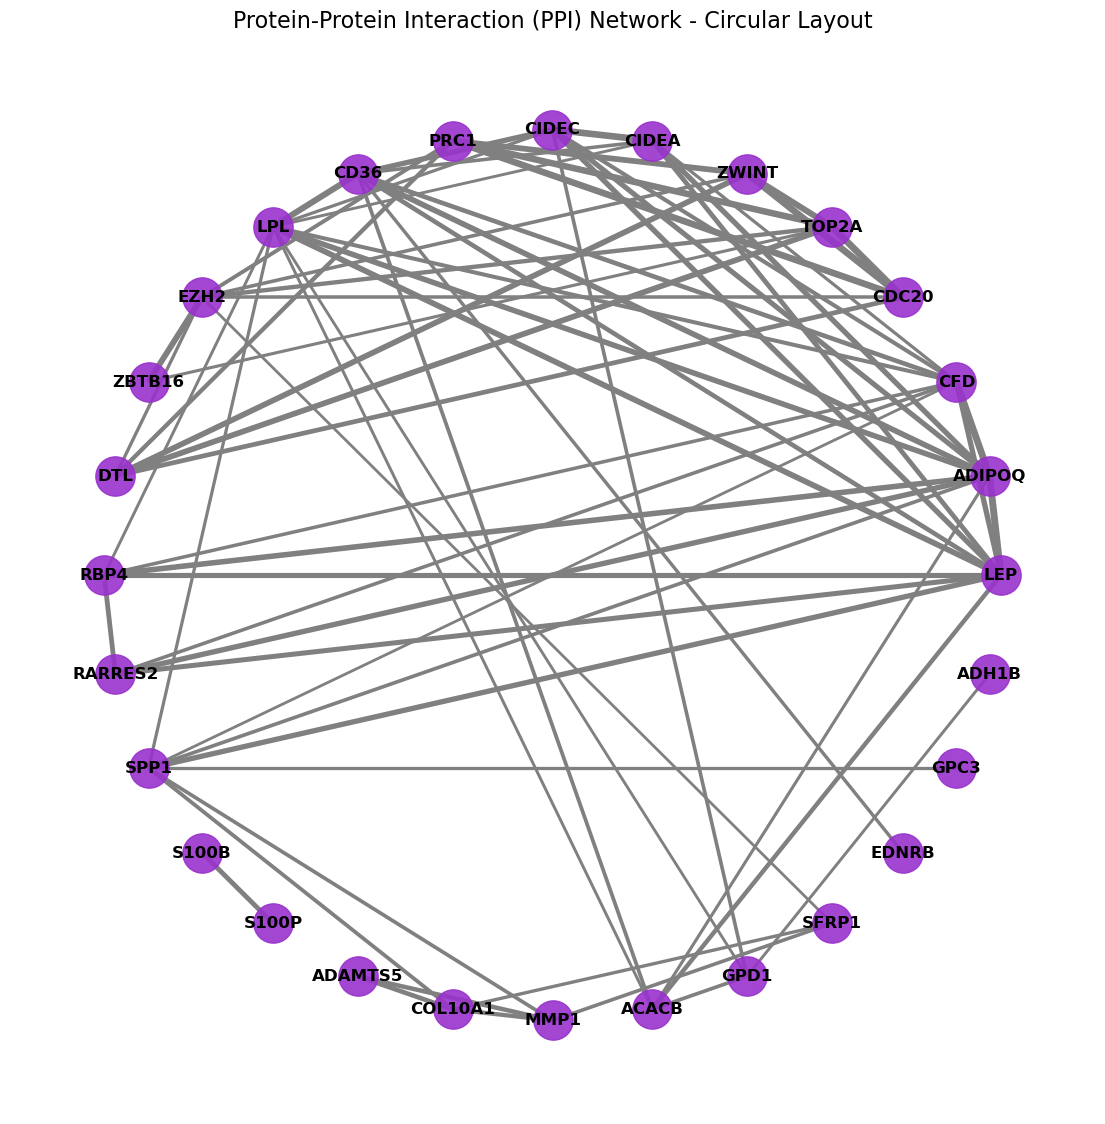

In [40]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# Define STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

# Parameters for API request
params = {
    "identifiers": "%0d".join(selected_genes),  # Join genes with newlines for the API request
    "species": 9606,                            # Human species
    "network_type": "functional",               # Functional associations
    "required_score": 400,                      # Confidence threshold (400 = medium confidence)
    "caller_identity": "python_script"
}

# Send request to STRING API
response = requests.get(STRING_API_URL, params=params)

# Check response
if response.status_code == 200:
    interactions = response.json()
    print("Data fetched successfully from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert API response into a DataFrame and display top interactions
if interactions:
    df = pd.DataFrame(interactions)
    # Keep only columns of interest
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    # Sort by confidence score (descending)
    df = df.sort_values(by='score', ascending=False)
    print(df.head())  # Display top few interactions
else:
    print("No interactions found.")
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Create a graph from interaction data
G = nx.Graph()

# Add edges from STRING interactions with weights
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Compute a circular layout for the graph
pos = nx.circular_layout(G)

# Scale edge thickness for clarity (example: multiply by 20 -> then by 25 for extra thickness)
edge_weights = [(G[u][v]['weight'] / 100) * 500 for u, v in G.edges()]

# Fixed node size
node_size = 800  

# Draw the circular network
plt.figure(figsize=(14, 14))

# Draw nodes
nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=node_size, 
    node_color="darkorchid", 
    alpha=0.9
)

# Draw labels
nx.draw_networkx_labels(
    G, 
    pos, 
    font_size=12, 
    font_weight="bold", 
    font_color="black"
)

# Draw edges with a thick width and a lighter color (gray)
nx.draw_networkx_edges(
    G, 
    pos, 
    width=edge_weights, 
    edge_color="gray", 
    alpha=1.0
)

plt.title("Protein-Protein Interaction (PPI) Network - Circular Layout", fontsize=16)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()


Data successfully fetched from STRING API.
Applying Tamoxifen effects...
 - Removed PRC1
 - Weakened S100P - S100B interaction
Applying Anastrozole effects...
 - Reduced connectivity of ADIPOQ with LEP
 - Reduced connectivity of ADIPOQ with CFD
 - Reduced connectivity of ADIPOQ with CD36
 - Reduced connectivity of ADIPOQ with RBP4
 - Reduced connectivity of ADIPOQ with LPL
 - Reduced connectivity of ADIPOQ with RARRES2
 - Reduced connectivity of ADIPOQ with CIDEA
 - Reduced connectivity of ADIPOQ with CIDEC
 - Reduced connectivity of ADIPOQ with SPP1
 - Reduced connectivity of ADIPOQ with ACACB
 - Reduced connectivity of LEP with ADIPOQ
 - Reduced connectivity of LEP with LPL
 - Reduced connectivity of LEP with CIDEC
 - Reduced connectivity of LEP with CFD
 - Reduced connectivity of LEP with SPP1
 - Reduced connectivity of LEP with RBP4
 - Reduced connectivity of LEP with RARRES2
 - Reduced connectivity of LEP with CIDEA
 - Reduced connectivity of LEP with CD36
 - Reduced connectivity 

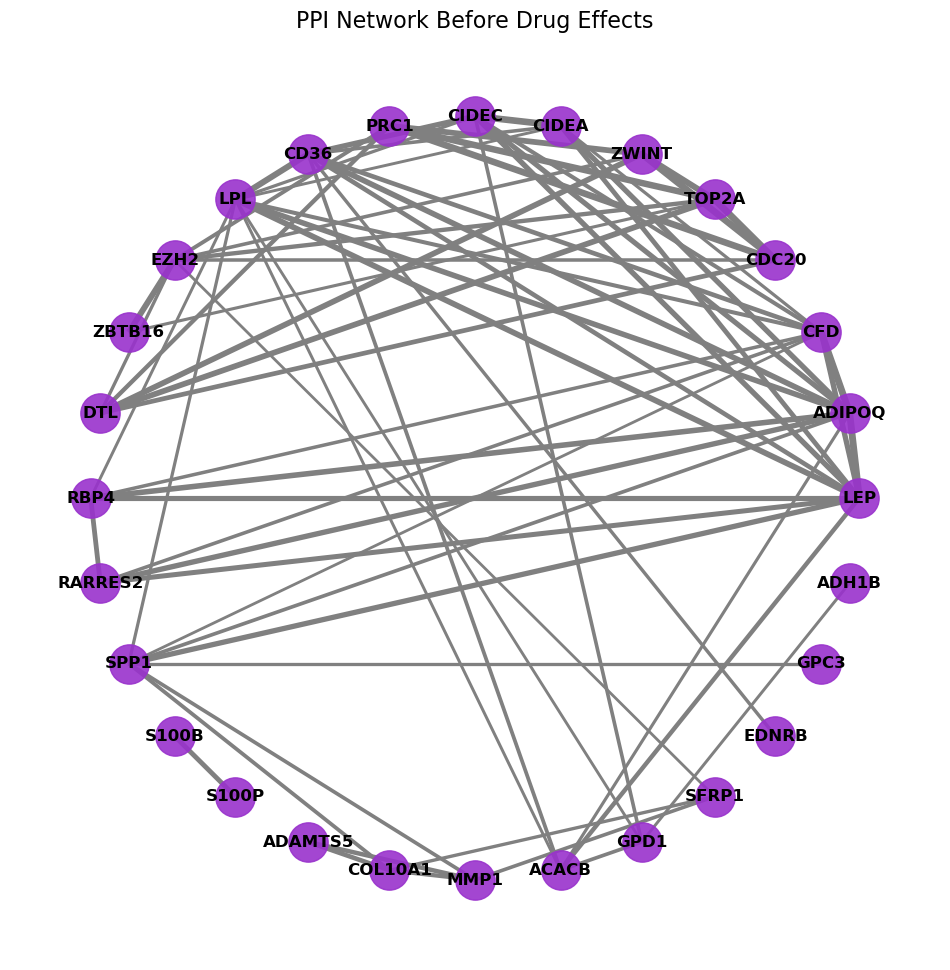

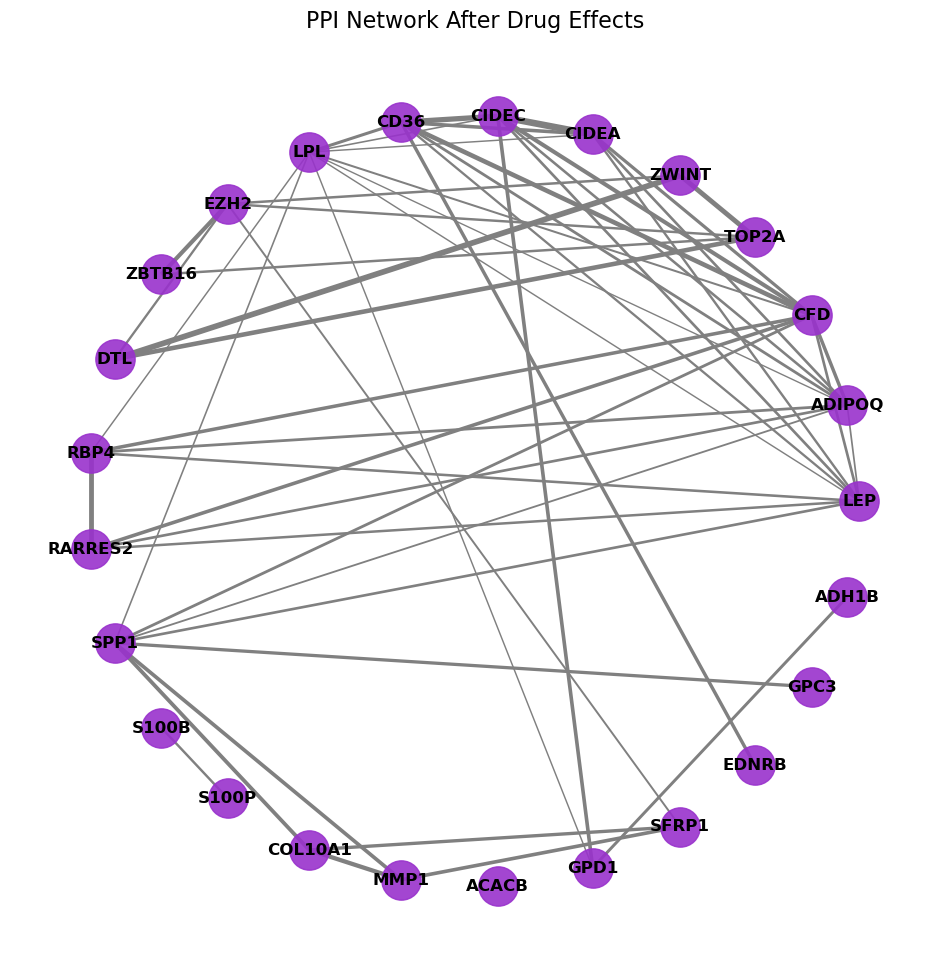

In [30]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

# Parameters for STRING API request
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,  
    "network_type": "functional",  
    "required_score": 400,  
    "caller_identity": "python_script"
}

# Send API request
response = requests.get(STRING_API_URL, params=params)

# Process API response
if response.status_code == 200:
    interactions = response.json()
    print("Data successfully fetched from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert API response into a DataFrame
if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Create graph from interaction data
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Function to compute extended network metrics
def calculate_extended_metrics(graph):
    """
    Calculates advanced network statistics including diameter, density, and centralization.
    """
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}

    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False

    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. number of neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes() if graph.number_of_nodes() > 0 else 0,
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }

    return metrics

# Store original network metrics
original_metrics = calculate_extended_metrics(G)

# Define drug effects
drug_effects = {
    "Tamoxifen": {"remove": ["PRC1"], "weaken_edges": [("S100P", "S100B", 0.5)]},
    "Anastrozole": {"reduce_connectivity": ["ADIPOQ", "LEP", "LPL"]},
    "Trastuzumab": {"remove": ["CDC20"], "weaken_edges": [("EZH2", None, 0.7)]},
    "Palbociclib": {"reduce_importance": ["TOP2A", "PRC1"]},
    "Capecitabine": {"remove": ["ADAMTS5"], "disrupt_edges": [("ACACB", None)]}
}

# Function to apply drug effects
def apply_drug_effects(graph, effects):
    G_modified = graph.copy()

    for drug, changes in effects.items():
        print(f"Applying {drug} effects...")

        # Remove nodes
        if "remove" in changes:
            for node in changes["remove"]:
                if node in G_modified:
                    G_modified.remove_node(node)
                    print(f" - Removed {node}")

        # Weaken edges
        if "weaken_edges" in changes:
            for node1, node2, factor in changes["weaken_edges"]:
                if node1 in G_modified and (node2 is None or node2 in G_modified):
                    for neighbor in (G_modified[node1] if node2 is None else [node2]):
                        if G_modified.has_edge(node1, neighbor):
                            G_modified[node1][neighbor]['weight'] *= factor
                            print(f" - Weakened {node1} - {neighbor} interaction")

        # Reduce connectivity
        if "reduce_connectivity" in changes:
            for node in changes["reduce_connectivity"]:
                if node in G_modified:
                    for neighbor in list(G_modified[node]):
                        G_modified[node][neighbor]['weight'] *= 0.5
                        print(f" - Reduced connectivity of {node} with {neighbor}")

        # Reduce node importance
        if "reduce_importance" in changes:
            for node in changes["reduce_importance"]:
                if node in G_modified:
                    for neighbor in list(G_modified[node]):
                        G_modified[node][neighbor]['weight'] *= 0.8
                        print(f" - Reduced importance of {node}")

        # Disrupt edges
        if "disrupt_edges" in changes:
            for node1, node2 in changes["disrupt_edges"]:
                if node1 in G_modified:
                    if node2 is None:
                        for neighbor in list(G_modified[node1]):
                            G_modified.remove_edge(node1, neighbor)
                            print(f" - Disrupted {node1} interactions")
                    elif G_modified.has_edge(node1, node2):
                        G_modified.remove_edge(node1, node2)
                        print(f" - Disrupted {node1} - {node2} interaction")

    return G_modified

# Apply drug effects
G_post_drug = apply_drug_effects(G, drug_effects)

# Compute post-drug network metrics
post_drug_metrics = calculate_extended_metrics(G_post_drug)

# Print network metrics before and after drug effects
print("\n**Network Metrics Before Drug Effects**")
for key, value in original_metrics.items():
    print(f"{key}: {value}")

print("\n**Network Metrics After Drug Effects**")
for key, value in post_drug_metrics.items():
    print(f"{key}: {value}")

# Function to visualize networks
def plot_network(graph, title):
    pos = nx.circular_layout(graph)
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="darkorchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold", font_color="black")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=1.0)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Visualize both networks
plot_network(G, "PPI Network Before Drug Effects")
plot_network(G_post_drug, "PPI Network After Drug Effects")


# ONLY FOR DoxoRubicin

Applying Doxorubicin effects...
 - Removed TOP2A
 - Weakened interaction between EZH2 and CDC20

**Network Metrics Before Doxorubicin Effects**
Number of nodes: 28
Number of edges: 69
Avg. neighbors: 4.928571428571429
Diameter: inf
Radius: inf
Path length: inf
Clustering Coef.: 0.596655328798186
Density: 0.18253968253968253
Heterogeneity: 0.25544437904649797
Centralization: 0.37037037037037035
Connected components: 2

**Network Metrics After Doxorubicin Effects**
Number of nodes: 27
Number of edges: 63
Avg. neighbors: 4.666666666666667
Diameter: inf
Radius: inf
Path length: inf
Clustering Coef.: 0.5499706055261611
Density: 0.1794871794871795
Heterogeneity: 0.31977995694809863
Centralization: 0.38461538461538464
Connected components: 2


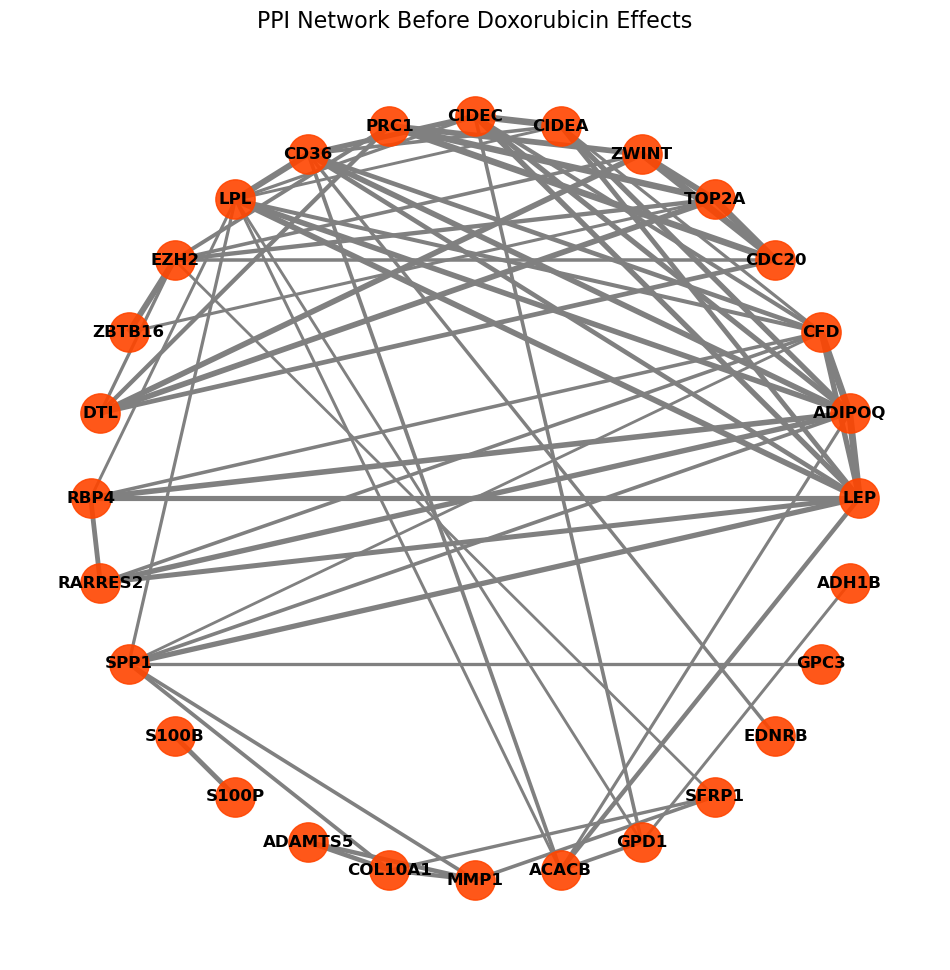

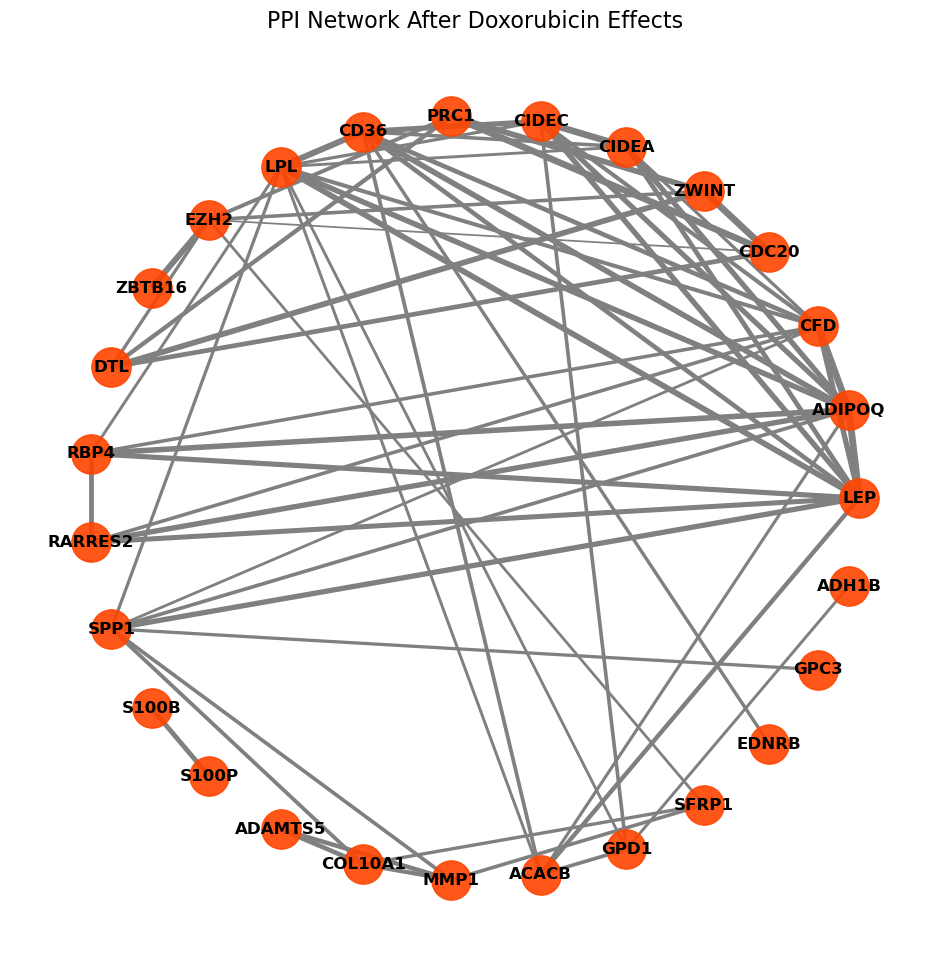

In [2]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# STRING API
STRING_API_URL = "https://string-db.org/api/json/network"
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,
    "network_type": "functional",
    "required_score": 400,
    "caller_identity": "python_script"
}

response = requests.get(STRING_API_URL, params=params)
interactions = response.json() if response.status_code == 200 else []
df = pd.DataFrame(interactions)[['preferredName_A', 'preferredName_B', 'score']] if interactions else pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])
df = df.sort_values(by='score', ascending=False)

# Build NetworkX graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Network metric function
def calculate_extended_metrics(graph):
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}
    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False
    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes(),
        "Diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Radius": nx.radius(graph) if is_connected else float('inf'),
        "Path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering Coef.": nx.average_clustering(graph),
        "Density": nx.density(graph),
        "Heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1),
        "Connected components": nx.number_connected_components(graph)
    }
    return metrics

original_metrics = calculate_extended_metrics(G)

# Simulated effect of Doxorubicin
doxorubicin_effects = {
    "remove": ["TOP2A"],  # Directly inhibited
    "weaken_edges": [("EZH2", "CDC20", 0.5)]  # Disrupting regulatory link
}

def apply_doxorubicin(graph, effects):
    G_modified = graph.copy()
    print("Applying Doxorubicin effects...")

    if "remove" in effects:
        for node in effects["remove"]:
            if node in G_modified:
                G_modified.remove_node(node)
                print(f" - Removed {node}")

    if "weaken_edges" in effects:
        for node1, node2, factor in effects["weaken_edges"]:
            if G_modified.has_edge(node1, node2):
                G_modified[node1][node2]['weight'] *= factor
                print(f" - Weakened interaction between {node1} and {node2}")
    
    return G_modified

G_post_dox = apply_doxorubicin(G, doxorubicin_effects)
post_dox_metrics = calculate_extended_metrics(G_post_dox)

# Print metrics
print("\n**Network Metrics Before Doxorubicin Effects**")
for key, value in original_metrics.items():
    print(f"{key}: {value}")

print("\n**Network Metrics After Doxorubicin Effects**")
for key, value in post_dox_metrics.items():
    print(f"{key}: {value}")

# Network plot
def plot_network(graph, title):
    pos = nx.circular_layout(graph)
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="orangered", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold", font_color="black")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=1.0)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

plot_network(G, "PPI Network Before Doxorubicin Effects")
plot_network(G_post_dox, "PPI Network After Doxorubicin Effects")


# ONLY FOR pacilataxel 

✅ Data successfully fetched from STRING API.

⚙️ Applying Paclitaxel effects...
 - Removed CDC20 (target of Paclitaxel)
 - Weakened TOP2A—EZH2 from 0.63 to 0.25
 - Weakened MMP1—SPP1 from 0.53 to 0.27

📊 **Network Metrics Before Paclitaxel Effects**
Number of nodes: 28
Number of edges: 69
Avg. number of neighbors: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.25544437904649797
Network centralization: 0.37037037037037035
Connected components: 2

📉 **Network Metrics After Paclitaxel Effects**
Number of nodes: 27
Number of edges: 64
Avg. number of neighbors: 4.7407407407407405
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.5783656672545562
Network density: 0.18233618233618235
Network heterogeneity: 0.31712587790383573
Network centralization: 0.38461538461538464
Connected components: 2


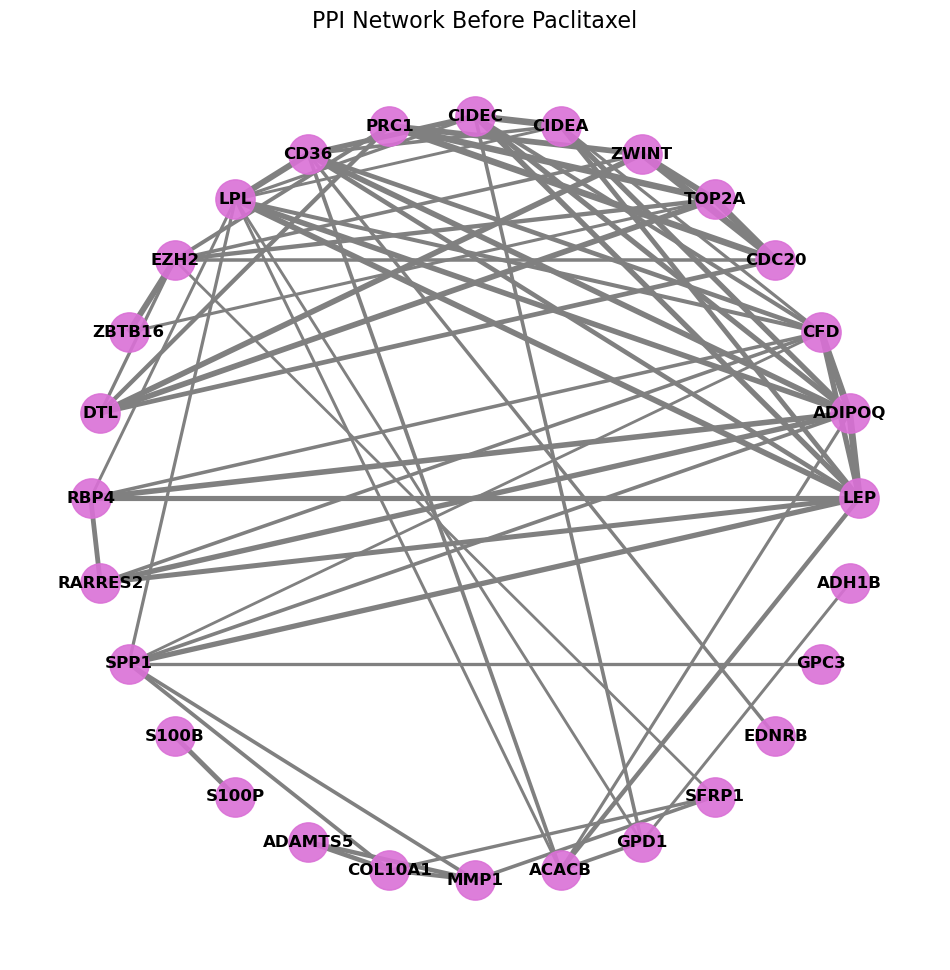

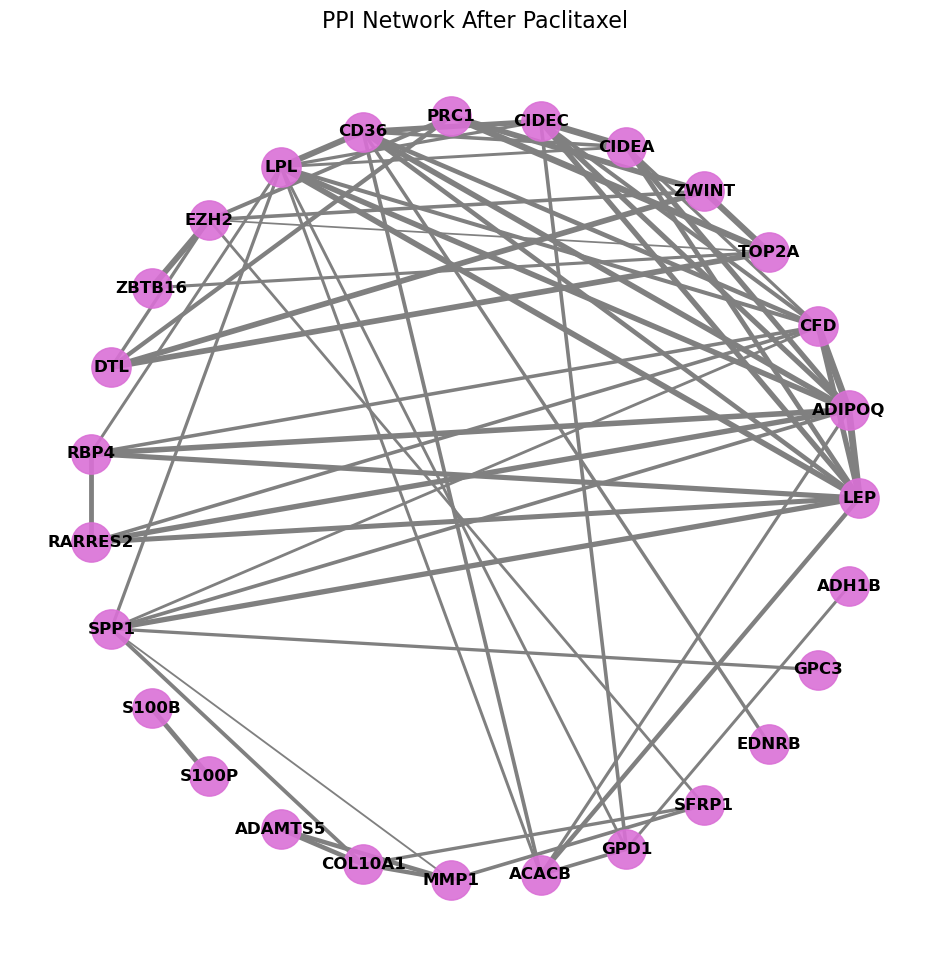

In [4]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,
    "network_type": "functional",
    "required_score": 400,
    "caller_identity": "python_script"
}

response = requests.get(STRING_API_URL, params=params)
if response.status_code == 200:
    interactions = response.json()
    print("✅ Data successfully fetched from STRING API.")
else:
    print("❌ Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert API response into DataFrame
if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Build graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Metric calculation function
def calculate_extended_metrics(graph):
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}

    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False

    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. number of neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes(),
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }
    return metrics

# Function to apply Paclitaxel effects
def apply_paclitaxel(graph):
    G_modified = graph.copy()
    print("\n⚙️ Applying Paclitaxel effects...")

    # Remove CDC20 (involved in mitosis)
    if "CDC20" in G_modified:
        G_modified.remove_node("CDC20")
        print(" - Removed CDC20 (target of Paclitaxel)")

    # Weaken interaction between TOP2A-EZH2 and MMP1-SPP1
    weakened_edges = [
        ("TOP2A", "EZH2", 0.4),
        ("MMP1", "SPP1", 0.5)
    ]
    for node1, node2, factor in weakened_edges:
        if node1 in G_modified and node2 in G_modified and G_modified.has_edge(node1, node2):
            original_weight = G_modified[node1][node2]['weight']
            G_modified[node1][node2]['weight'] *= factor
            print(f" - Weakened {node1}—{node2} from {original_weight:.2f} to {G_modified[node1][node2]['weight']:.2f}")

    return G_modified

# Plotting function
def plot_network(graph, title):
    pos = nx.circular_layout(graph)
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="orchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=1.0)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Calculate metrics before drug effect
original_metrics = calculate_extended_metrics(G)

# Apply Paclitaxel and calculate new metrics
G_after_paclitaxel = apply_paclitaxel(G)
post_metrics = calculate_extended_metrics(G_after_paclitaxel)

# Show before and after metrics
print("\n📊 **Network Metrics Before Paclitaxel Effects**")
for k, v in original_metrics.items():
    print(f"{k}: {v}")

print("\n📉 **Network Metrics After Paclitaxel Effects**")
for k, v in post_metrics.items():
    print(f"{k}: {v}")

# Visualizations
plot_network(G, "PPI Network Before Paclitaxel")
plot_network(G_after_paclitaxel, "PPI Network After Paclitaxel")


# Combined Drug Affect  (Sirolimus + Paclitaxel) 

✅ Data successfully fetched from STRING API.

⚙️ Applying Combination Therapy (Paclitaxel + Sirolimus)...
 - Removed CDC20 (affected by drugs)
 - Removed EZH2 (affected by drugs)
 - Removed TOP2A (affected by drugs)
 - Removed PRC1 (affected by drugs)
 - Weakened MMP1—SPP1 from 0.53 to 0.27
 - Weakened LEP—ADIPOQ from 0.99 to 0.30
 - Weakened CIDEC—CFD from 0.58 to 0.23

📊 **Network Metrics Before Combination Therapy**
Number of nodes: 28
Number of edges: 69
Avg. number of neighbors: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.25544437904649797
Network centralization: 0.37037037037037035
Connected components: 2

🧬 **Network Metrics After Combination Therapy (Paclitaxel + Sirolimus)**
Number of nodes: 24
Number of edges: 52
Avg. number of neighbors: 4.333333333333333
Network diameter: inf
Network radius: inf
Characteristic path length: i

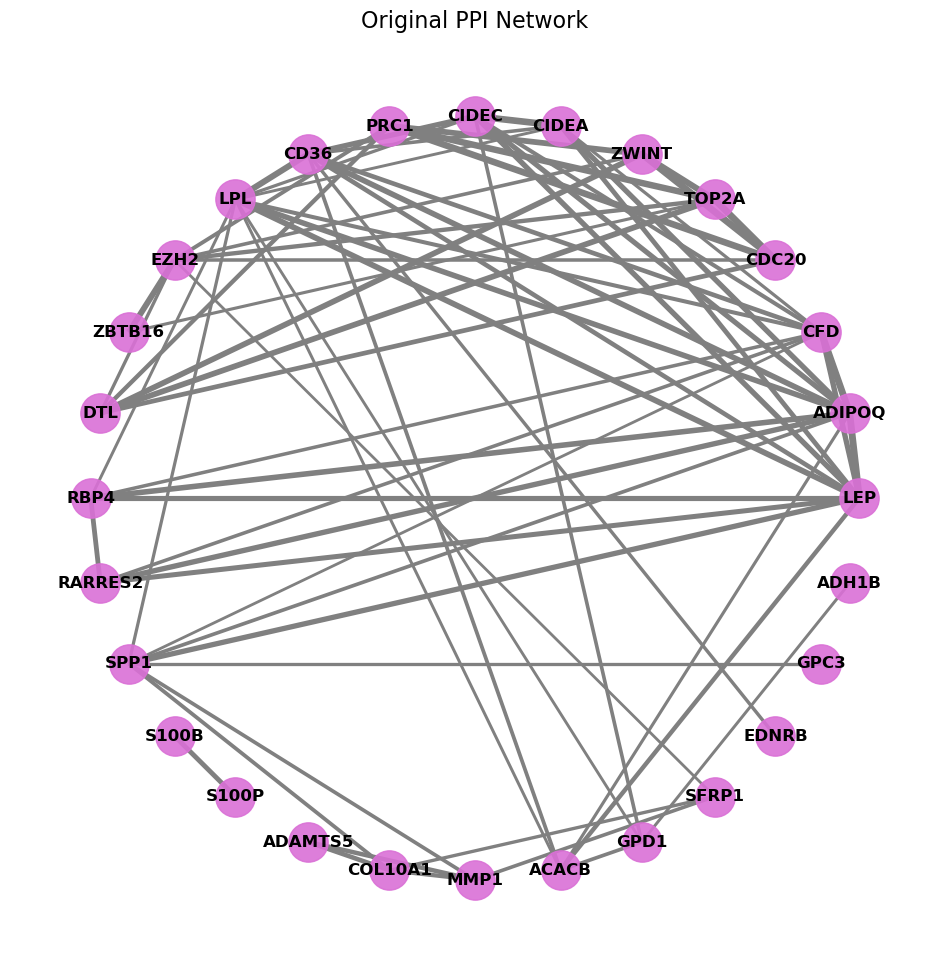

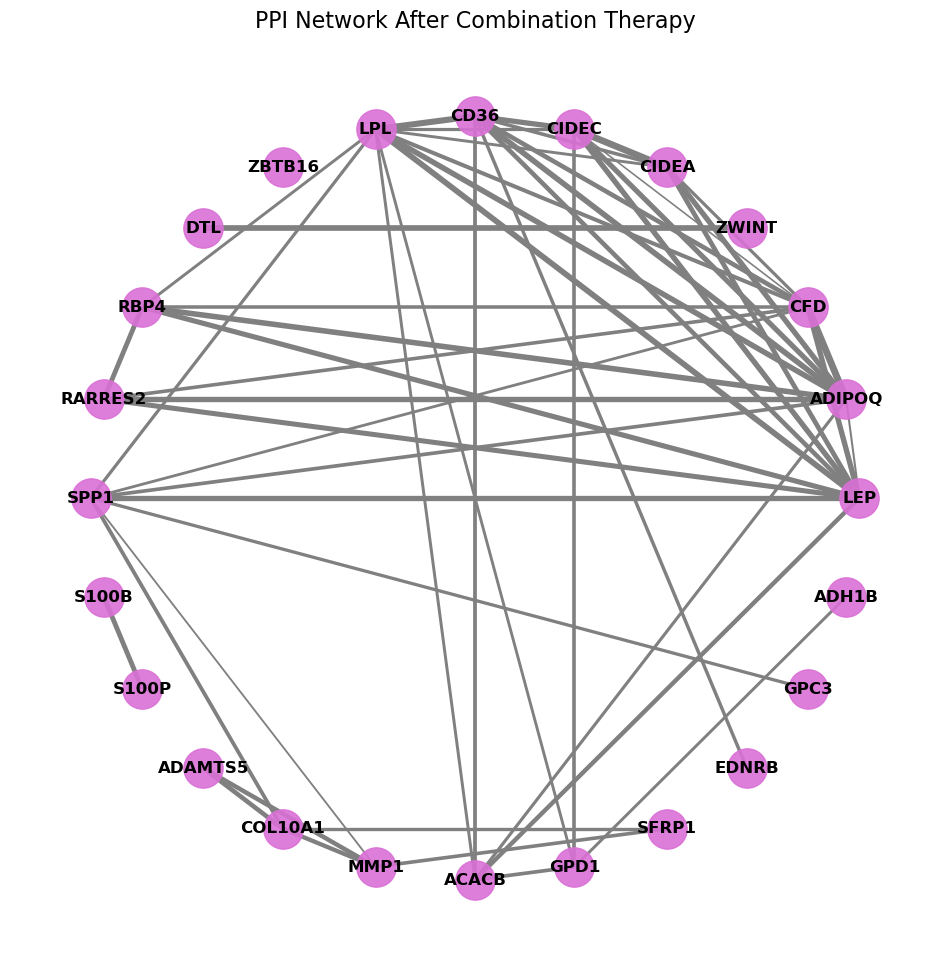

In [6]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# STRING API request
STRING_API_URL = "https://string-db.org/api/json/network"
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,
    "network_type": "functional",
    "required_score": 400,
    "caller_identity": "python_script"
}

response = requests.get(STRING_API_URL, params=params)
if response.status_code == 200:
    interactions = response.json()
    print("✅ Data successfully fetched from STRING API.")
else:
    print("❌ Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert to DataFrame
if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Build base graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Metric calculation function
def calculate_extended_metrics(graph):
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}
    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False
    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. number of neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes(),
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }
    return metrics

# Plotting function
def plot_network(graph, title):
    pos = nx.circular_layout(graph)
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="orchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=1.0)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Combination Therapy: Paclitaxel + Sirolimus
def apply_combination_therapy(graph):
    G_modified = graph.copy()
    print("\n⚙️ Applying Combination Therapy (Paclitaxel + Sirolimus)...")

    # Nodes to remove (merged targets)
    nodes_to_remove = ["CDC20", "EZH2", "TOP2A", "PRC1"]
    for node in nodes_to_remove:
        if node in G_modified:
            G_modified.remove_node(node)
            print(f" - Removed {node} (affected by drugs)")

    # Combined weakened edges
    weakened_edges = [
        ("MMP1", "SPP1", 0.5),        # Paclitaxel & Sirolimus
        ("TOP2A", "EZH2", 0.4),       # Paclitaxel
        ("LEP", "ADIPOQ", 0.3),       # Sirolimus
        ("CIDEC", "CFD", 0.4)         # Sirolimus
    ]
    for node1, node2, factor in weakened_edges:
        if node1 in G_modified and node2 in G_modified and G_modified.has_edge(node1, node2):
            original_weight = G_modified[node1][node2]['weight']
            G_modified[node1][node2]['weight'] *= factor
            print(f" - Weakened {node1}—{node2} from {original_weight:.2f} to {G_modified[node1][node2]['weight']:.2f}")

    return G_modified

# Calculate base metrics
original_metrics = calculate_extended_metrics(G)

# Apply combination therapy
G_combined = apply_combination_therapy(G)
combined_metrics = calculate_extended_metrics(G_combined)

# Print metrics
print("\n📊 **Network Metrics Before Combination Therapy**")
for k, v in original_metrics.items():
    print(f"{k}: {v}")

print("\n🧬 **Network Metrics After Combination Therapy (Paclitaxel + Sirolimus)**")
for k, v in combined_metrics.items():
    print(f"{k}: {v}")

# Plot networks
plot_network(G, "Original PPI Network")
plot_network(G_combined, "PPI Network After Combination Therapy")


# (Doxorubicin + Vorinostat) Drug Effects

✅ Data successfully fetched from STRING API.

⚙️ Applying Combination Therapy (Vorinostat + Doxorubicin)...
 - Removed EZH2 (affected by drugs)
 - Removed TOP2A (affected by drugs)
 - Removed PRC1 (affected by drugs)
 - Removed CDC20 (affected by drugs)
 - Removed S100B (affected by drugs)
 - Weakened MMP1—SPP1 from 0.53 to 0.27
 - Weakened LEP—ADIPOQ from 0.99 to 0.30
 - Weakened CIDEC—CFD from 0.58 to 0.23

📊 **Network Metrics BEFORE Combination Therapy**
Number of nodes: 28
Number of edges: 69
Avg. number of neighbors: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.25544437904649797
Network centralization: 0.37037037037037035
Connected components: 2

🧬 **Network Metrics AFTER Combination Therapy (Vorinostat + Doxorubicin)**
Number of nodes: 23
Number of edges: 51
Avg. number of neighbors: 4.434782608695652
Network diameter: inf
Network 

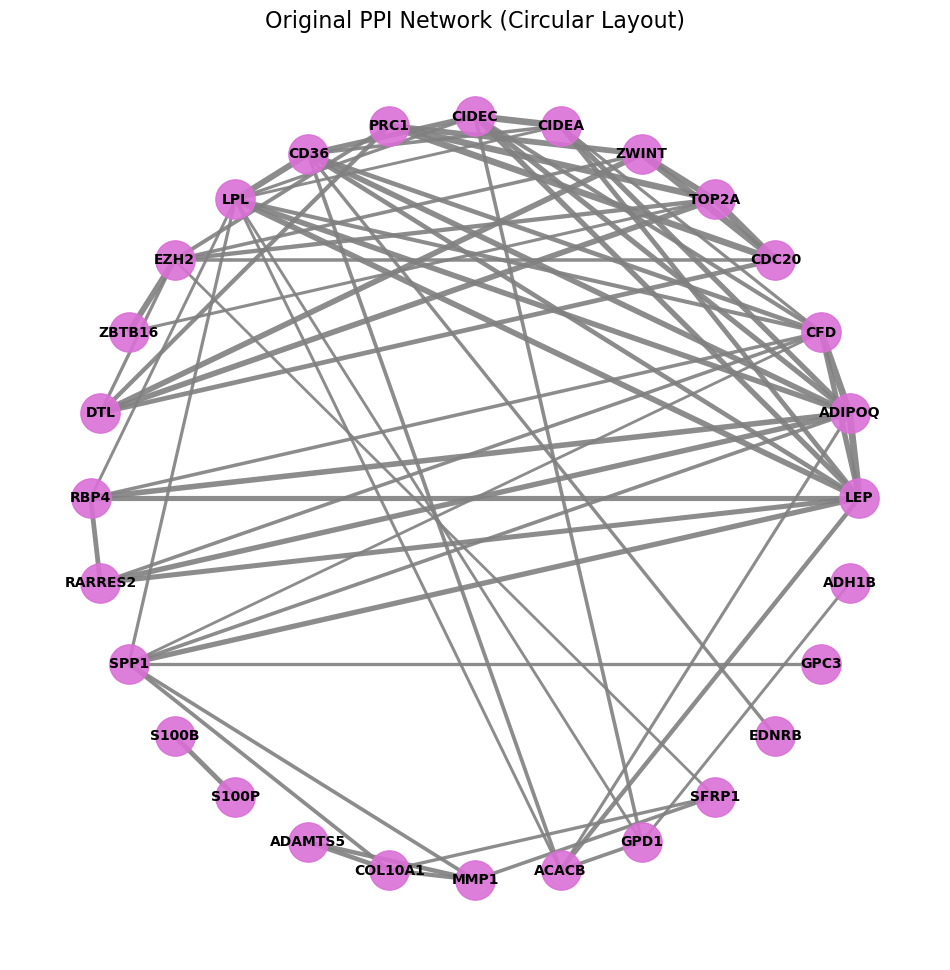

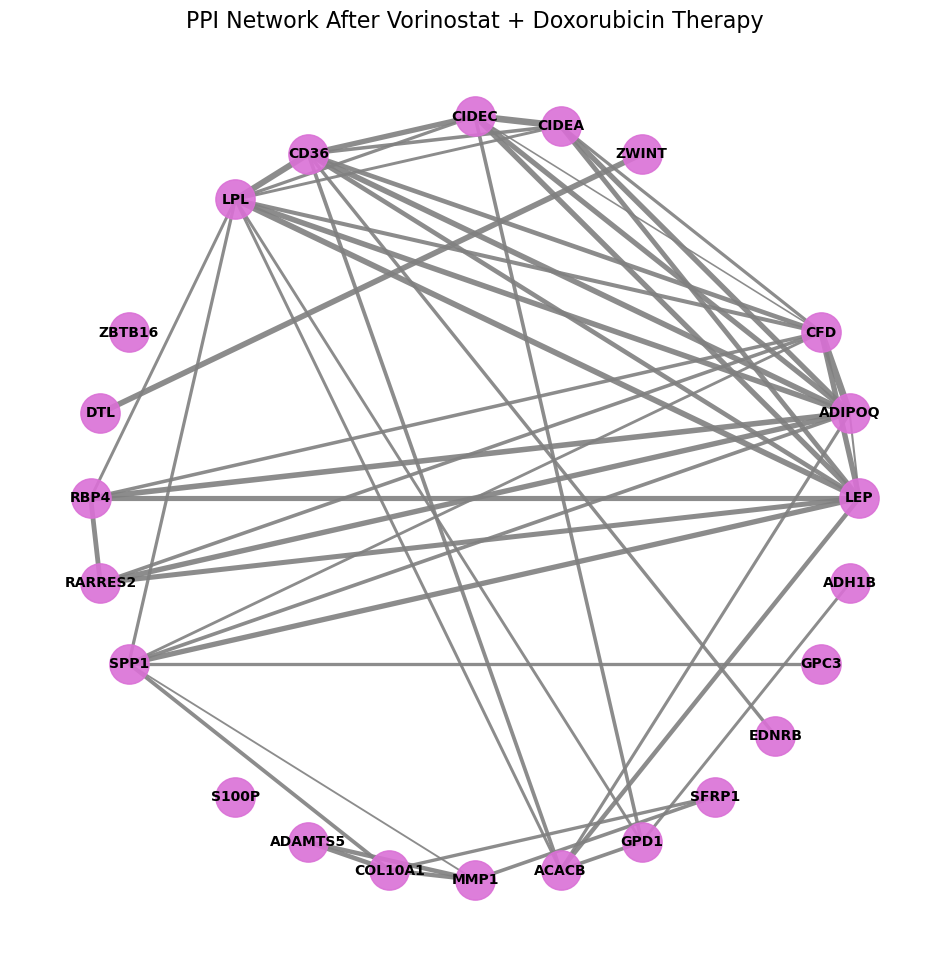

In [8]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# Fetch interactions from STRING
STRING_API_URL = "https://string-db.org/api/json/network"
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,
    "network_type": "functional",
    "required_score": 400,
    "caller_identity": "python_script"
}

response = requests.get(STRING_API_URL, params=params)
if response.status_code == 200:
    interactions = response.json()
    print("✅ Data successfully fetched from STRING API.")
else:
    print("❌ Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert to DataFrame
if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Build original graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Fixed circular layout for both networks
fixed_pos = nx.circular_layout(G)

# Function to calculate extended metrics
def calculate_extended_metrics(graph):
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}
    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False
    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. number of neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes(),
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }
    return metrics

# Function to plot the network using circular layout
def plot_network(graph, title, pos):
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="orchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight="bold")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=0.9)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Apply Vorinostat + Doxorubicin combination therapy
def apply_combination_therapy_vorinostat_doxorubicin(graph):
    G_modified = graph.copy()
    print("\n⚙️ Applying Combination Therapy (Vorinostat + Doxorubicin)...")

    # Nodes removed due to drug targeting
    nodes_to_remove = ["EZH2", "TOP2A", "PRC1", "CDC20", "S100B"]
    for node in nodes_to_remove:
        if node in G_modified:
            G_modified.remove_node(node)
            print(f" - Removed {node} (affected by drugs)")

    # Edges weakened due to epigenetic or downstream inhibition
    weakened_edges = [
        ("MMP1", "SPP1", 0.5),        # Shared downstream
        ("LEP", "ADIPOQ", 0.3),       # Vorinostat
        ("CIDEC", "CFD", 0.4),        # Vorinostat
        ("TOP2A", "EZH2", 0.4)        # Both
    ]
    for node1, node2, factor in weakened_edges:
        if node1 in G_modified and node2 in G_modified and G_modified.has_edge(node1, node2):
            original_weight = G_modified[node1][node2]['weight']
            G_modified[node1][node2]['weight'] *= factor
            print(f" - Weakened {node1}—{node2} from {original_weight:.2f} to {G_modified[node1][node2]['weight']:.2f}")

    return G_modified

# ----- MAIN WORKFLOW -----

# 1. Calculate metrics before therapy
original_metrics = calculate_extended_metrics(G)

# 2. Apply therapy and calculate new metrics
G_combined = apply_combination_therapy_vorinostat_doxorubicin(G)
combined_metrics = calculate_extended_metrics(G_combined)

# 3. Print metrics
print("\n📊 **Network Metrics BEFORE Combination Therapy**")
for k, v in original_metrics.items():
    print(f"{k}: {v}")

print("\n🧬 **Network Metrics AFTER Combination Therapy (Vorinostat + Doxorubicin)**")
for k, v in combined_metrics.items():
    print(f"{k}: {v}")

# 4. Plot the original and modified networks (same circular layout)
plot_network(G, "Original PPI Network (Circular Layout)", fixed_pos)
plot_network(G_combined, "PPI Network After Vorinostat + Doxorubicin Therapy", fixed_pos)


# Vincristine + Doxorubicin + Cyclophosphamide)

✅ Data successfully fetched from STRING API.

⚙️ Applying Combination Therapy (Vincristine + Doxorubicin + Cyclophosphamide)...
 - Removed CDC20 (affected by drugs)
 - Removed TOP2A (affected by drugs)
 - Removed PRC1 (affected by drugs)
 - Weakened LEP—ADIPOQ from 0.99 to 0.40
 - Weakened SPP1—MMP1 from 0.53 to 0.27
 - Weakened CIDEC—CFD from 0.58 to 0.23

📊 **Network Metrics Before Combination Therapy**
Number of nodes: 28
Number of edges: 69
Avg. number of neighbors: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.25544437904649797
Network centralization: 0.37037037037037035
Connected components: 2

🧬 **Network Metrics After Combination Therapy (VAC: Vincristine + Doxorubicin + Cyclophosphamide)**
Number of nodes: 25
Number of edges: 56
Avg. number of neighbors: 4.48
Network diameter: inf
Network radius: inf
Characteristic path length: i

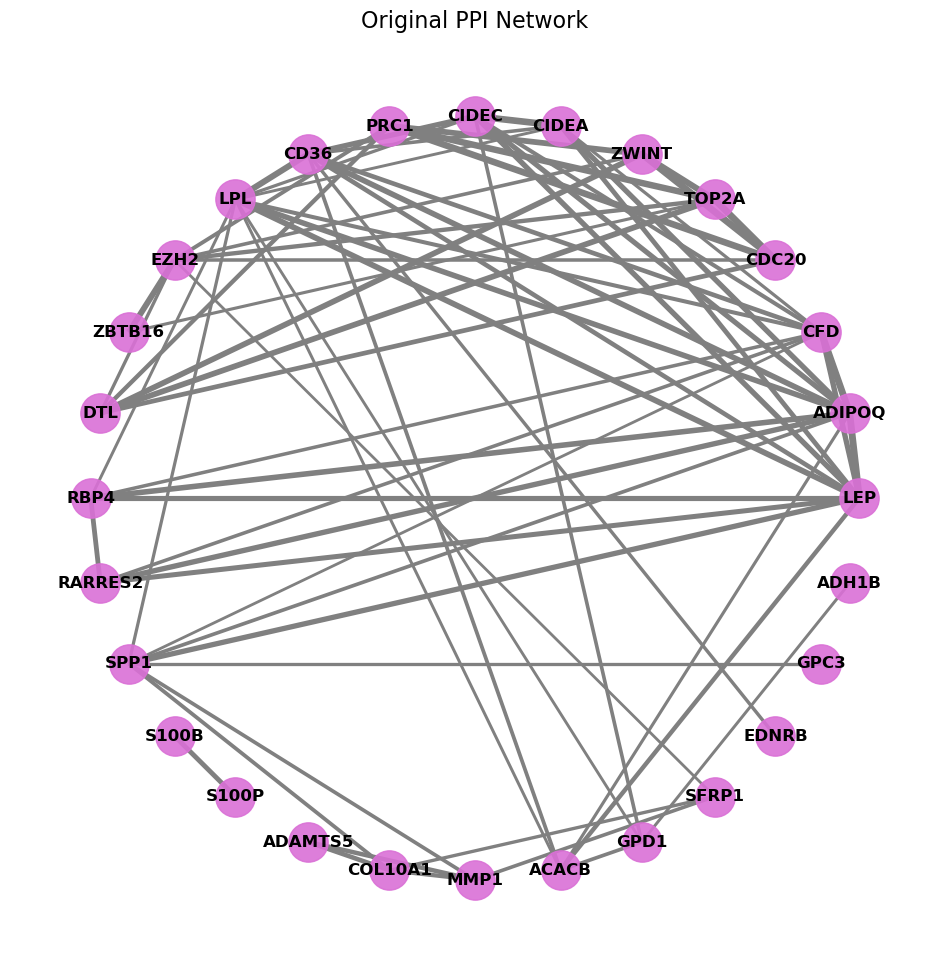

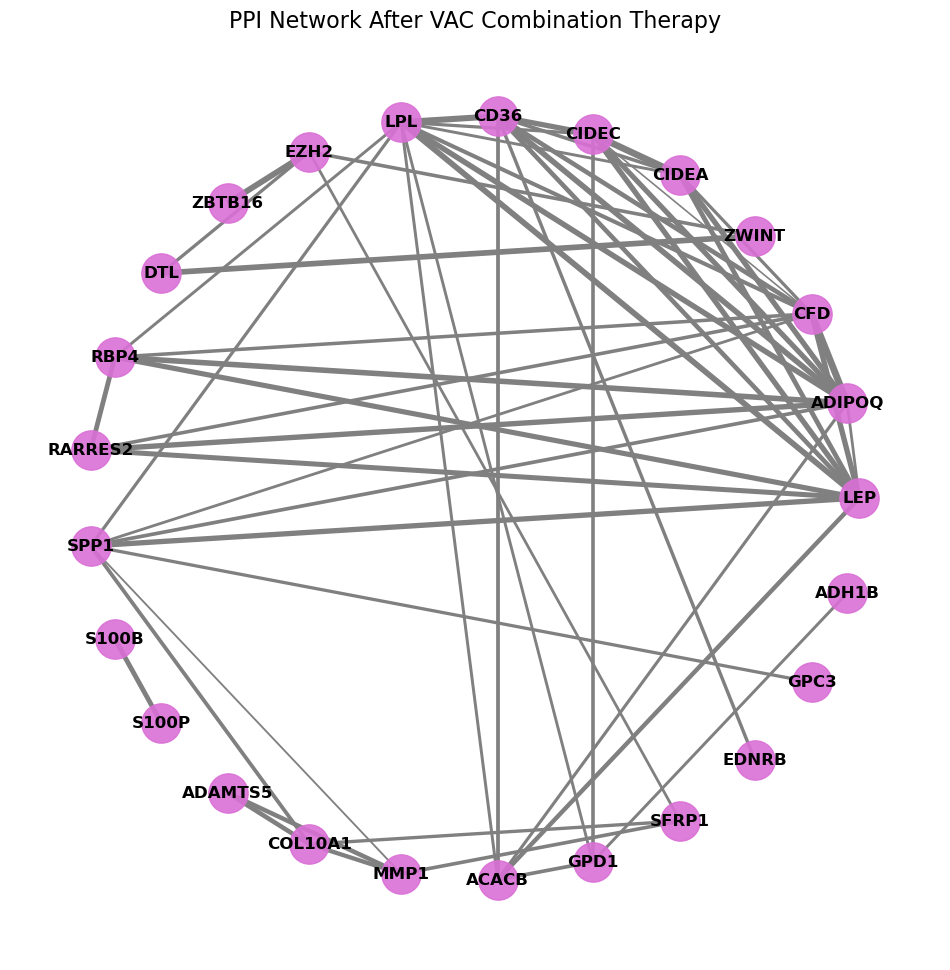

In [9]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# STRING API request
STRING_API_URL = "https://string-db.org/api/json/network"
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,
    "network_type": "functional",
    "required_score": 400,
    "caller_identity": "python_script"
}

response = requests.get(STRING_API_URL, params=params)
if response.status_code == 200:
    interactions = response.json()
    print("✅ Data successfully fetched from STRING API.")
else:
    print("❌ Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert to DataFrame
if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Build base graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Metric calculation function
def calculate_extended_metrics(graph):
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}
    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False
    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. number of neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes(),
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }
    return metrics

# Plotting function
def plot_network(graph, title):
    pos = nx.circular_layout(graph)
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="orchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=1.0)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Combination Therapy: Vincristine + Doxorubicin + Cyclophosphamide (VAC)
def apply_vac_therapy(graph):
    G_modified = graph.copy()
    print("\n⚙️ Applying Combination Therapy (Vincristine + Doxorubicin + Cyclophosphamide)...")

    # Nodes to remove (known direct targets or severely affected)
    nodes_to_remove = ["CDC20", "TOP2A", "PRC1"]  # TOP2A = target of Doxorubicin; PRC1, CDC20 = mitotic regulators (Vincristine)
    for node in nodes_to_remove:
        if node in G_modified:
            G_modified.remove_node(node)
            print(f" - Removed {node} (affected by drugs)")

    # Weakened edges (pathways or known interactions downregulated)
    weakened_edges = [
        ("EZH2", "TOP2A", 0.3),     # Topoisomerase II and chromatin modifier interaction
        ("LEP", "ADIPOQ", 0.4),     # Adipokine pathway modulation by Cyclophosphamide
        ("SPP1", "MMP1", 0.5),      # ECM remodeling suppression (Cyclophosphamide effect)
        ("CIDEC", "CFD", 0.4)       # Metabolic network weakened by VAC therapy
    ]
    for node1, node2, factor in weakened_edges:
        if node1 in G_modified and node2 in G_modified and G_modified.has_edge(node1, node2):
            original_weight = G_modified[node1][node2]['weight']
            G_modified[node1][node2]['weight'] *= factor
            print(f" - Weakened {node1}—{node2} from {original_weight:.2f} to {G_modified[node1][node2]['weight']:.2f}")

    return G_modified

# Calculate base metrics
original_metrics = calculate_extended_metrics(G)

# Apply VAC therapy
G_vac = apply_vac_therapy(G)
vac_metrics = calculate_extended_metrics(G_vac)

# Print metrics
print("\n📊 **Network Metrics Before Combination Therapy**")
for k, v in original_metrics.items():
    print(f"{k}: {v}")

print("\n🧬 **Network Metrics After Combination Therapy (VAC: Vincristine + Doxorubicin + Cyclophosphamide)**")
for k, v in vac_metrics.items():
    print(f"{k}: {v}")

# Plot networks
plot_network(G, "Original PPI Network")
plot_network(G_vac, "PPI Network After VAC Combination Therapy")


Data successfully fetched from STRING API.
Applying Vorinostat effects...
 - Removed EZH2

**Network Metrics Before Vorinostat Effects**
Number of nodes: 28
Number of edges: 69
Avg. number of neighbors: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.2554443790464979
Network centralization: 0.37037037037037035
Connected components: 2

**Network Metrics After Vorinostat Effects**
Number of nodes: 27
Number of edges: 62
Avg. number of neighbors: 4.592592592592593
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.5820693709582598
Network density: 0.17663817663817663
Network heterogeneity: 0.35469734319364543
Network centralization: 0.38461538461538464
Connected components: 3


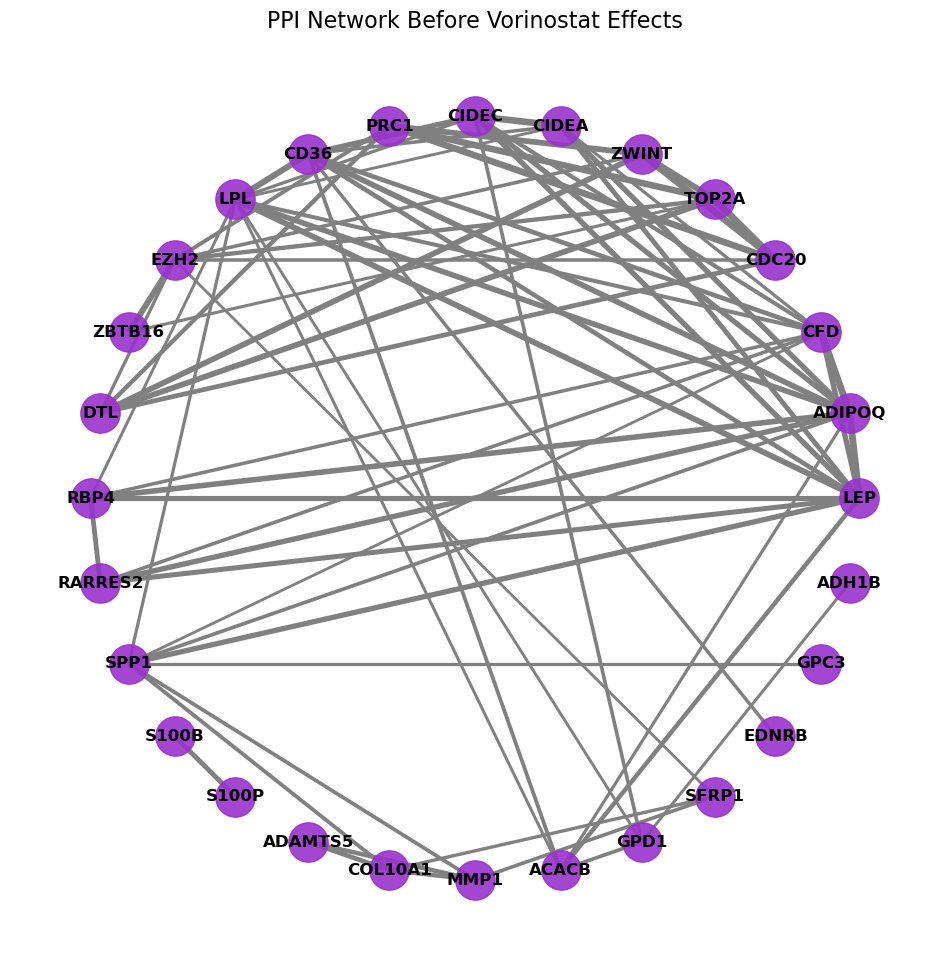

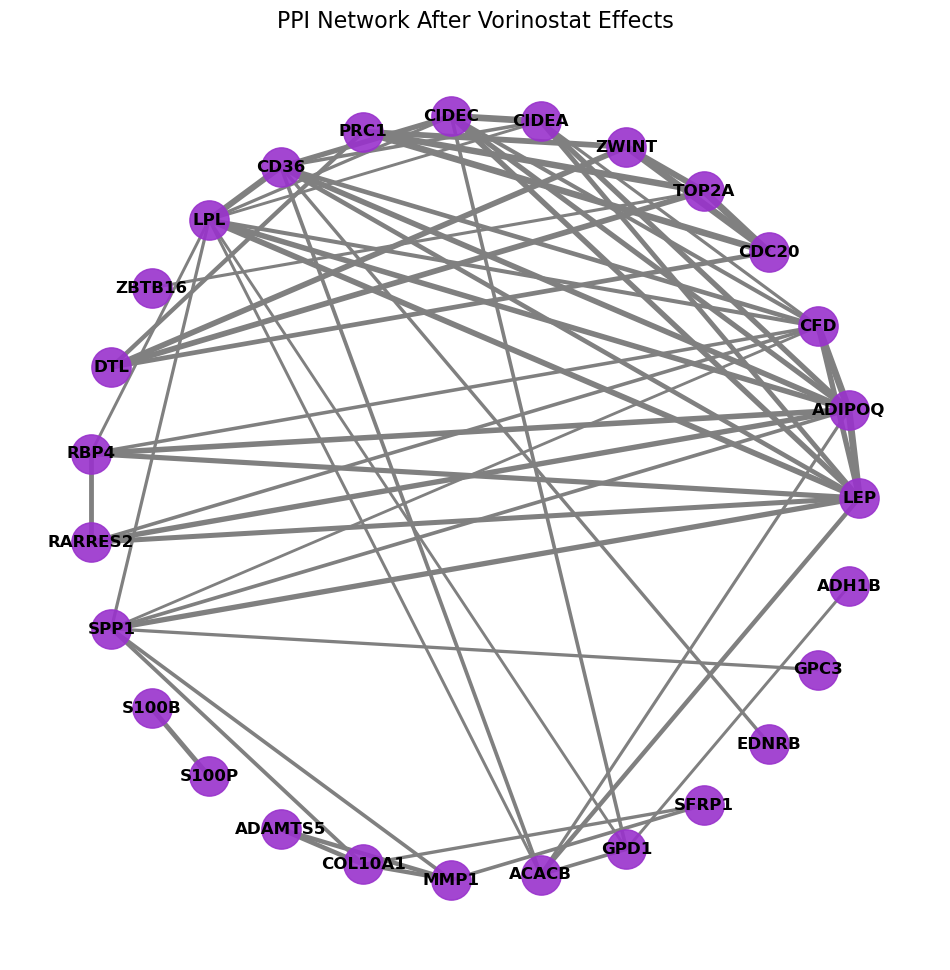

In [5]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

# Parameters for STRING API request
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,  
    "network_type": "functional",  
    "required_score": 400,  
    "caller_identity": "python_script"
}

# Send API request
response = requests.get(STRING_API_URL, params=params)

# Process API response
if response.status_code == 200:
    interactions = response.json()
    print("Data successfully fetched from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert API response into a DataFrame
if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Create graph from interaction data
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Function to compute extended network metrics
def calculate_extended_metrics(graph):
    """
    Calculates advanced network statistics including diameter, density, and centralization.
    """
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}

    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False

    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. number of neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes() if graph.number_of_nodes() > 0 else 0,
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }

    return metrics

# Store original network metrics
original_metrics = calculate_extended_metrics(G)

# Define Vorinostat Effects
vorinostat_effects = {
    "remove": ["EZH2"],  
    "weaken_edges": []  # Vorinostat mainly disrupts epigenetic regulation rather than direct PPI weakening
}

# Function to apply Vorinostat effects
def apply_vorinostat_effects(graph, effects):
    G_modified = graph.copy()

    print("Applying Vorinostat effects...")

    # Remove targeted nodes
    if "remove" in effects:
        for node in effects["remove"]:
            if node in G_modified:
                G_modified.remove_node(node)
                print(f" - Removed {node}")

    return G_modified

# Apply Vorinostat effects
G_post_vorinostat = apply_vorinostat_effects(G, vorinostat_effects)

# Compute post-Vorinostat network metrics
post_vorinostat_metrics = calculate_extended_metrics(G_post_vorinostat)

# Print network metrics before and after Vorinostat effects
print("\n**Network Metrics Before Vorinostat Effects**")
for key, value in original_metrics.items():
    print(f"{key}: {value}")

print("\n**Network Metrics After Vorinostat Effects**")
for key, value in post_vorinostat_metrics.items():
    print(f"{key}: {value}")

# Function to visualize networks
def plot_network(graph, title):
    pos = nx.circular_layout(graph)
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="darkorchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold", font_color="black")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=1.0)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Visualize both networks
plot_network(G, "PPI Network Before Vorinostat Effects")
plot_network(G_post_vorinostat, "PPI Network After Vorinostat Effects")


# ML working 

Data successfully fetched from STRING API.
Model training complete.
Test Accuracy: 1.00


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Applicati


**Network Metrics Before Drug Effect**
Number of nodes: 28
Number of edges: 69
Avg. number of neighbors: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.25544437904649797
Network centralization: 0.37037037037037035
Connected components: 2

**Network Metrics After Capecitabine Effect**
Number of nodes: 28
Number of edges: 69
Avg. number of neighbors: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.2554443790464979
Network centralization: 0.37037037037037035
Connected components: 2


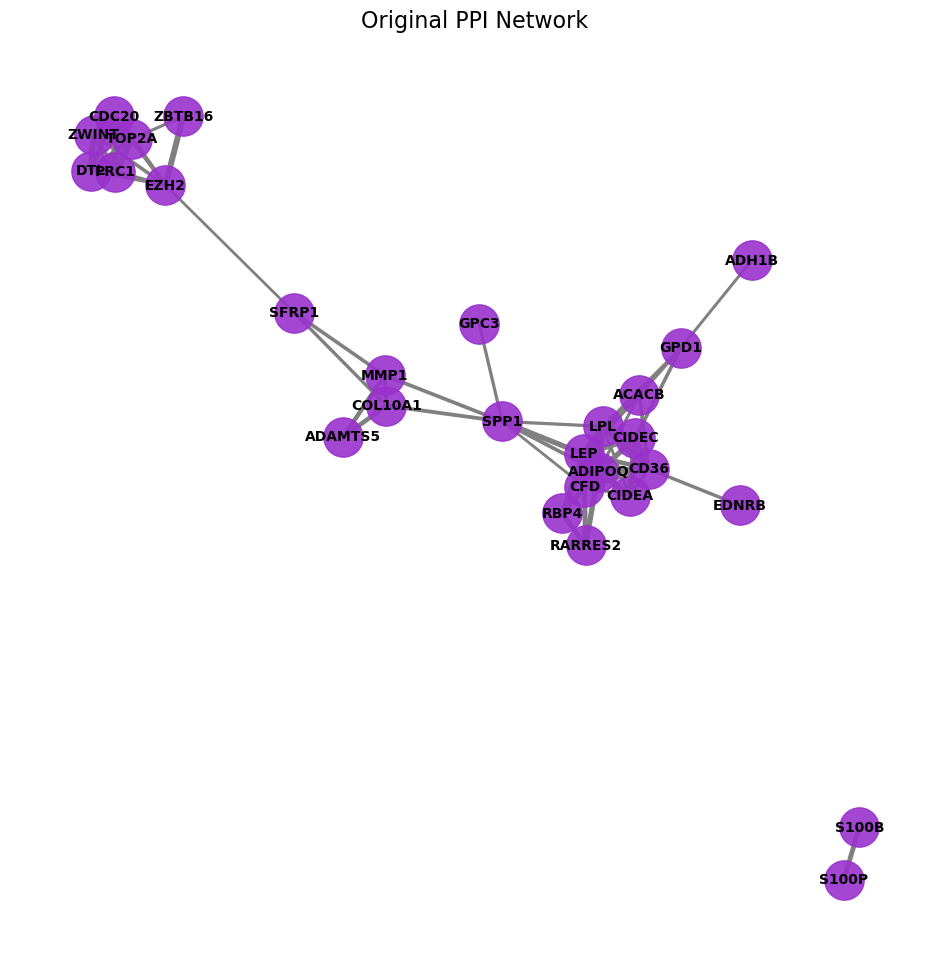

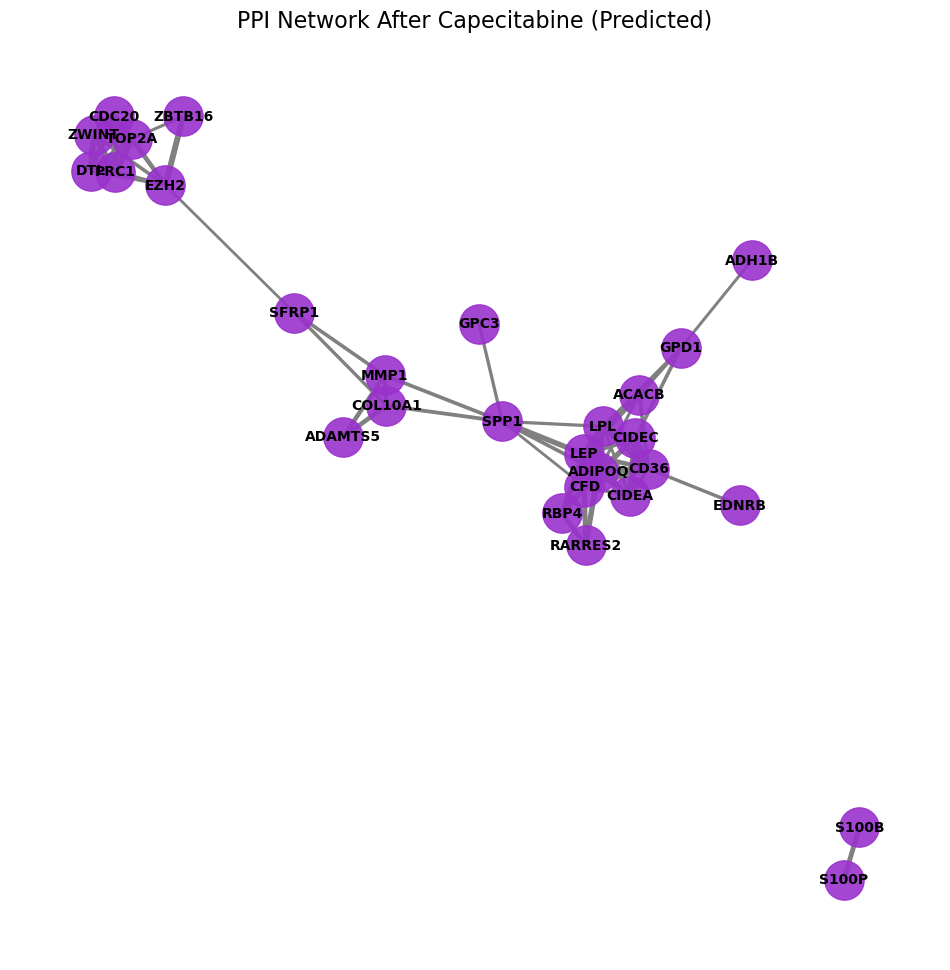

In [56]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.preprocessing import LabelEncoder
import numpy as np

# ============================================
# 1. Original Network Code (unchanged)
# ============================================

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

STRING_API_URL = "https://string-db.org/api/json/network"

params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,
    "network_type": "functional",
    "required_score": 400,
    "caller_identity": "python_script"
}

response = requests.get(STRING_API_URL, params=params)
if response.status_code == 200:
    interactions = response.json()
    print("Data successfully fetched from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Create the original network graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

def calculate_extended_metrics(graph):
    """
    Calculates advanced network statistics including diameter, density, and centralization.
    """
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}

    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False

    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. number of neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes() if graph.number_of_nodes() > 0 else 0,
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }
    return metrics

original_metrics = calculate_extended_metrics(G)

def plot_network(graph, title):
    pos = nx.spring_layout(graph, seed=42)
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="darkorchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight="bold", font_color="black")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=1.0)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# ============================================
# 2. Load Drug-Gene Effect Data (Mock Example)
# ============================================
# Suppose we have a CSV: drug_gene_effects.csv with columns: [Drug, Gene, Effect]
# For demonstration, the 'Effect' is a categorical label: upregulated / downregulated / no_change
data_df = pd.read_csv("/Users/abdullahsaqib/Desktop/drug_gene_effects.csv")  # <-- This is hypothetical, replace with your real data

# Let's encode the categorical effect
le = LabelEncoder()
data_df["Effect_encoded"] = le.fit_transform(data_df["Effect"])  # e.g. upregulated -> 2, downregulated -> 1, no_change -> 0

# Features might be Drug, Gene, etc. You would typically have more features, 
# such as drug descriptors (molecular weight, chemical structure embeddings, etc.).
# For simplicity, we’ll do a naive approach: convert 'Drug' and 'Gene' to numeric categories.
drug_encoder = LabelEncoder()
gene_encoder = LabelEncoder()

data_df["Drug_encoded"] = drug_encoder.fit_transform(data_df["Drug"])
data_df["Gene_encoded"] = gene_encoder.fit_transform(data_df["Gene"])

# We'll define X as the drug & gene, and y as the effect
X = data_df[["Drug_encoded", "Gene_encoded"]]
y = data_df["Effect_encoded"]

# ============================================
# 3. Train-Test Split & Model Training
# ============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Model training complete.")

# Evaluate quickly on test set
accuracy = rf_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# ============================================
# 4. Predict Drug Effects & Modify the Network
# ============================================
def predict_drug_effects_on_network(graph, drug_name, model, drug_enc, gene_enc, effect_decoder):
    """
    Given a trained model, a drug name, and the original PPI network, 
    predict how each gene in the network might be affected by the drug.
    Then, return a modified network based on these predictions.
    """
    G_modified = graph.copy()
    
    # For demonstration, we'll predict the effect of `drug_name` on every gene in the graph
    # (In reality, you'd only predict for known or suspected targets of that drug.)
    if not G_modified.nodes:
        return G_modified  # No changes if the graph is empty

    # Prepare the drug-encoded value
    if drug_name not in list(drug_enc.classes_):
        print(f"Warning: {drug_name} not found in training data. Predictions may be inaccurate.")
    drug_val = drug_enc.transform([drug_name])[0] if drug_name in drug_enc.classes_ else 0
    
    for node in list(G_modified.nodes):
        if node not in gene_enc.classes_:
            # If the gene wasn't in the training set, skip or handle differently
            continue
        
        gene_val = gene_enc.transform([node])[0]
        X_pred = np.array([[drug_val, gene_val]])
        effect_encoded = model.predict(X_pred)[0]
        effect_label = effect_decoder.inverse_transform([effect_encoded])[0]
        
        # Example effect actions:
        #   - 'downregulated': remove node or reduce edge weight
        #   - 'upregulated': maybe increase edge weight or add new edges (hypothetical)
        #   - 'no_change': do nothing
        if effect_label == "downregulated":
            # For demonstration, we remove or reduce connectivity
            if node in G_modified:
                # Option 1: remove node
                # G_modified.remove_node(node)
                
                # Option 2: weaken edges by 50% to simulate partial inhibition
                for neighbor in list(G_modified[node]):
                    G_modified[node][neighbor]["weight"] *= 0.5

        elif effect_label == "upregulated":
            # Possibly increase edge weights by 20% to simulate activation
            for neighbor in list(G_modified[node]):
                G_modified[node][neighbor]["weight"] *= 1.2
        else:
            # no_change => do nothing
            pass
    
    return G_modified

# Choose a drug from your list to demonstrate
chosen_drug = "Capecitabine"  # Example
G_after_drug = predict_drug_effects_on_network(
    graph=G,
    drug_name=chosen_drug,
    model=rf_model,
    drug_enc=drug_encoder,
    gene_enc=gene_encoder,
    effect_decoder=le
)

# Calculate network metrics after the drug effect
post_drug_metrics = calculate_extended_metrics(G_after_drug)

# ============================================
# 5. Compare & Visualize
# ============================================
print("\n**Network Metrics Before Drug Effect**")
for key, value in original_metrics.items():
    print(f"{key}: {value}")

print(f"\n**Network Metrics After {chosen_drug} Effect**")
for key, value in post_drug_metrics.items():
    print(f"{key}: {value}")

# Visualize
plot_network(G, "Original PPI Network")
plot_network(G_after_drug, f"PPI Network After {chosen_drug} (Predicted)")



In [54]:
import pandas as pd
import gzip
from io import StringIO

def read_ctd_file(file_path, expected_header_keyword="ChemicalName"):
    """
    Reads a gzipped CTD file that may have commented metadata lines.
    This function:
      1. Reads all lines from the file.
      2. Finds the header line (the first line that is commented and contains the expected keyword).
      3. Removes any subsequent comment lines.
      4. Reads the remaining data using pandas.
    """
    with gzip.open(file_path, 'rt') as f:
        lines = f.readlines()
    
    header_line = None
    header_index = None
    
    # Look for a commented header line that contains the expected keyword
    for i, line in enumerate(lines):
        if line.startswith('#') and expected_header_keyword in line:
            header_line = line.lstrip('#').strip()  # remove leading '#' and whitespace
            header_index = i
            break
    
    # If not found, assume the very first line is the header
    if header_line is None:
        header_line = lines[0].strip()
        header_index = 0

    # Build a list of lines: header + all subsequent lines that are not comments.
    # (Assumes that any additional commented lines are metadata, not part of the table.)
    data_lines = [header_line] + [line for line in lines[header_index+1:] if not line.startswith('#')]
    data_str = ''.join(data_lines)
    
    # Read the data from the string
    return pd.read_csv(StringIO(data_str), sep="\t")

# -------------------------------
# Step 1: Define local file paths
# -------------------------------
chemicals_diseases_file = "/Users/abdullahsaqib/Desktop/CTD_chemicals_diseases.tsv.gz"
chem_gene_ixns_file = "/Users/abdullahsaqib/Desktop/CTD_chem_gene_ixns.tsv.gz"

# ------------------------------------------
# Step 2: Load the CTD chemicals-diseases file
# ------------------------------------------
diseases_df = read_ctd_file(chemicals_diseases_file, expected_header_keyword="ChemicalName")

# Print out the columns so you can verify the correct disease column name
print("Columns in the chemicals-diseases file:")
print(diseases_df.columns.tolist())

# ------------------------------------------
# Step 3: Determine the disease column name
# ------------------------------------------
if "DiseaseName" in diseases_df.columns:
    disease_col = "DiseaseName"
elif "Disease" in diseases_df.columns:
    disease_col = "Disease"
else:
    raise KeyError("Neither 'DiseaseName' nor 'Disease' column was found in the file. Please check the file format.")

# ------------------------------------------
# Step 4: Filter for breast cancer related entries
# ------------------------------------------
breast_df = diseases_df[diseases_df[disease_col].str.contains("Breast Neoplasms", case=False, na=False)]
print(f"Found {breast_df.shape[0]} records associated with breast cancer.")

# ------------------------------------------
# Step 5: Load the CTD chemical–gene interactions file
# ------------------------------------------
chem_gene_df = read_ctd_file(chem_gene_ixns_file, expected_header_keyword="ChemicalName")

# ------------------------------------------
# Step 6: Define a helper function to parse 'InteractionActions'
# ------------------------------------------
def parse_effect(actions_str):
    """
    Convert CTD 'InteractionActions' to a simplified label:
    - 'increases expression' -> 'upregulated'
    - 'decreases expression' -> 'downregulated'
    - Otherwise -> 'no_change'
    """
    if pd.isna(actions_str):
        return "no_change"
    actions_list = actions_str.lower().split('|')
    if "increases expression" in actions_list:
        return "upregulated"
    elif "decreases expression" in actions_list:
        return "downregulated"
    else:
        return "no_change"

chem_gene_df["Effect"] = chem_gene_df["InteractionActions"].apply(parse_effect)

# ------------------------------------------
# Step 7: Join the two datasets to keep only chemicals linked to breast cancer
# ------------------------------------------
breast_chem_gene = pd.merge(
    chem_gene_df,
    breast_df[["ChemicalName"]].drop_duplicates(),
    on="ChemicalName",
    how="inner"
)

# ------------------------------------------
# Step 8: Rename and select columns for final output
# ------------------------------------------
breast_chem_gene = breast_chem_gene.rename(columns={
    "ChemicalName": "Drug",
    "GeneSymbol": "Gene"
})
breast_chem_gene = breast_chem_gene[["Drug", "Gene", "Effect"]].drop_duplicates()

# ------------------------------------------
# Step 9: Preview and save the CSV
# ------------------------------------------
print("Preview of final breast cancer–specific interactions:")
print(breast_chem_gene.head(10))

breast_chem_gene.to_csv("drug_gene_effects.csv", index=False)
print("\nSaved breast cancer–specific interactions to 'drug_gene_effects.csv'.")


/var/folders/r4/8dcrm4qn38s6bjnvd17cg1t00000gn/T/ipykernel_16910/3180385361.py:38: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(StringIO(data_str), sep="\t")


Columns in the chemicals-diseases file:
['ChemicalName', 'ChemicalID', 'CasRN', 'DiseaseName', 'DiseaseID', 'DirectEvidence', 'InferenceGeneSymbol', 'InferenceScore', 'OmimIDs', 'PubMedIDs06-Paris-LA-66 protocol', 'C046983', 'Unnamed: 11', 'Precursor Cell Lymphoblastic Leukemia-Lymphoma', 'MESH:D054198', 'therapeutic', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', '4519131']
Found 140996 records associated with breast cancer.
Preview of final breast cancer–specific interactions:
                                                Drug     Gene     Effect
0                                           10074-G5       AR  no_change
3                                           10074-G5    EPHB2  no_change
5                                           10074-G5      MAX  no_change
7                                           10074-G5      MYC  no_change
14  10,10-bis(4-pyridinylmethyl)-9(10H)-anthracenone      FOS  no_change
15  10,10-bis(4-pyridinylmethyl)-9(10H)-anthracenone    KCNQ1  no_change
16  10

In [61]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------
# 1. FETCH STRING NETWORK
# -----------------------------
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

STRING_API_URL = "https://string-db.org/api/json/network"
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,
    "network_type": "functional",
    "required_score": 400,
    "caller_identity": "python_script"
}

response = requests.get(STRING_API_URL, params=params)
if response.status_code == 200:
    interactions = response.json()
    print("Data successfully fetched from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# -----------------------------
# 2. DEFINE NETWORK METRICS
# -----------------------------
def calculate_extended_metrics(graph):
    """
    Calculates advanced network statistics including diameter, density, and centralization.
    """
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}

    is_connected = False
    if graph.number_of_nodes() > 1:
        is_connected = nx.is_connected(graph)

    metrics = {
        "Number of nodes": graph.number_of_nodes(),
        "Number of edges": graph.number_of_edges(),
        "Avg. degree": sum(dict(graph.degree()).values()) / graph.number_of_nodes() if graph.number_of_nodes() > 0 else 0,
        "Network diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Network radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Network density": nx.density(graph),
        "Network heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Network centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }
    return metrics

# -----------------------------
# 3. DRUG EFFECTS DICTIONARY
# -----------------------------
drug_effects = {
    "Tamoxifen": {
        "remove_nodes": ["PRC1"],
        "weaken_edges": [("S100P", "S100B", 0.5)]
    },
    "Anastrozole": {
        "weaken_node_edges": [("ADIPOQ", 0.5), ("LEP", 0.5), ("LPL", 0.5)]
    },
    "Trastuzumab": {
        "remove_nodes": ["CDC20"],
        "weaken_node_edges": [("EZH2", 0.5)]
    },
    "Palbociclib": {
        "weaken_node_edges": [("TOP2A", 0.5), ("PRC1", 0.5)]
    },
    "Capecitabine": {
        "remove_nodes": ["ADAMTS5"],  # Example: or "ADAMTS8" if that node is in your original list
        "remove_node_edges": ["ACACB"]
    }
}

# -----------------------------
# 4. FUNCTION TO APPLY DRUGS
# -----------------------------
def apply_drug_effects(graph, effects):
    G_modified = graph.copy()

    # 1. Remove specific nodes
    if "remove_nodes" in effects:
        for node in effects["remove_nodes"]:
            if node in G_modified:
                G_modified.remove_node(node)
                print(f"Removed node: {node}")

    # 2. Weaken specific edges
    if "weaken_edges" in effects:
        for (n1, n2, factor) in effects["weaken_edges"]:
            if G_modified.has_edge(n1, n2):
                G_modified[n1][n2]['weight'] *= factor
                print(f"Weakened edge: {n1}–{n2} by factor {factor}")

    # 3. Weaken all edges for certain nodes
    if "weaken_node_edges" in effects:
        for (node, factor) in effects["weaken_node_edges"]:
            if node in G_modified:
                for neighbor in list(G_modified[node]):
                    G_modified[node][neighbor]['weight'] *= factor
                print(f"Weakened all edges for node {node} by factor {factor}")

    # 4. Remove all edges of certain nodes
    if "remove_node_edges" in effects:
        for node in effects["remove_node_edges"]:
            if node in G_modified:
                neighbors = list(G_modified[node])
                for neighbor in neighbors:
                    G_modified.remove_edge(node, neighbor)
                print(f"Disconnected node: {node}")

    return G_modified

# -----------------------------
# 5. VISUALIZATION FUNCTION
# -----------------------------
def plot_network(graph, title):
    pos = nx.spring_layout(graph, seed=42)  # or circular_layout, etc.
    edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="darkorchid", alpha=0.9)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color="white", font_weight="bold")
    # Scale edge widths for visibility
    nx.draw_networkx_edges(graph, pos, width=[w/10 for w in edge_weights], edge_color="gray", alpha=0.7)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# -----------------------------
# 6. MAIN LOOP: APPLY EACH DRUG
# -----------------------------
original_metrics = calculate_extended_metrics(G)
print("Original Network Metrics:")
for k, v in original_metrics.items():
    print(f"{k}: {v}")
print("========================================\n")

for drug_name, effects in drug_effects.items():
    print(f"Applying {drug_name}...")
    # Create a copy of the original network and apply the drug
    G_modified = apply_drug_effects(G, effects)
    
    # Calculate metrics after applying drug
    modified_metrics = calculate_extended_metrics(G_modified)
    
    # Print results
    print(f"\nNetwork Metrics After {drug_name}:")
    for k, v in modified_metrics.items():
        print(f"{k}: {v}")
    print("----------------------------------------\n")
    
    # (Optional) Visualize the network
    # plot_network(G_modified, f"{drug_name} - Modified Network")


Data successfully fetched from STRING API.
Original Network Metrics:
Number of nodes: 28
Number of edges: 69
Avg. degree: 4.928571428571429
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Network density: 0.18253968253968253
Network heterogeneity: 0.25544437904649797
Network centralization: 0.37037037037037035
Connected components: 2

Applying Tamoxifen...
Removed node: PRC1
Weakened edge: S100P–S100B by factor 0.5

Network Metrics After Tamoxifen:
Number of nodes: 27
Number of edges: 64
Avg. degree: 4.7407407407407405
Network diameter: inf
Network radius: inf
Characteristic path length: inf
Clustering coefficient: 0.5783656672545562
Network density: 0.18233618233618235
Network heterogeneity: 0.31712587790383573
Network centralization: 0.38461538461538464
Connected components: 2
----------------------------------------

Applying Anastrozole...
Weakened all edges for node ADIPOQ by factor 0.5
Weakened all edges for node

# DRUG INTERACTIONS 

In [2]:
import requests

# Your gene set
genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# Define the GraphQL query using the "genes" field and passing gene names.
query = """
query($names: [String!]!) {
  genes(names: $names) {
    nodes {
      name
      interactions {
        drug {
          name
          conceptId
        }
        interactionScore
        interactionTypes {
          type
          directionality
        }
        interactionAttributes {
          name
          value
        }
        publications {
          pmid
        }
        sources {
          sourceDbName
        }
      }
    }
  }
}
"""

# Set variables and endpoint
variables = {"names": genes}
url = "https://dgidb.org/api/graphql"
headers = {
    "Content-Type": "application/json",
    "Accept": "application/json",
    "User-Agent": "Mozilla/5.0"
}

# Send the POST request
response = requests.post(url, json={"query": query, "variables": variables}, headers=headers)
result = response.json()

# Check for errors
if "errors" in result:
    print("GraphQL errors:", result["errors"])
else:
    # Build a dictionary mapping each drug to the set of genes it interacts with
    drug_to_genes = {}
    gene_nodes = result.get("data", {}).get("genes", {}).get("nodes", [])
    for gene in gene_nodes:
        gene_name = gene.get("name")
        interactions = gene.get("interactions", [])
        for interaction in interactions:
            drug = interaction.get("drug")
            if not drug:
                continue
            drug_name = drug.get("name")
            if drug_name not in drug_to_genes:
                drug_to_genes[drug_name] = set()
            drug_to_genes[drug_name].add(gene_name)
    
    # Print the associations
    print("Drug–Gene Associations from DGIdb:")
    for drug, gene_set in drug_to_genes.items():
        print(f"{drug}: interacts with {len(gene_set)} gene(s) - {', '.join(sorted(gene_set))}")


Drug–Gene Associations from DGIdb:
ENDOTHELIN-1: interacts with 1 gene(s) - EDNRB
ENRASENTAN: interacts with 1 gene(s) - EDNRB
MACITENTAN: interacts with 1 gene(s) - EDNRB
SOVATELTIDE: interacts with 1 gene(s) - EDNRB
AMBRISENTAN: interacts with 1 gene(s) - EDNRB
RG-7636: interacts with 1 gene(s) - EDNRB
SITAXENTAN: interacts with 1 gene(s) - EDNRB
BQ788: interacts with 1 gene(s) - EDNRB
SITAXENTAN SODIUM: interacts with 1 gene(s) - EDNRB
TEZOSENTAN: interacts with 1 gene(s) - EDNRB
DARUSENTAN: interacts with 1 gene(s) - EDNRB
APROCITENTAN: interacts with 1 gene(s) - EDNRB
BOSENTAN ANHYDROUS: interacts with 1 gene(s) - EDNRB
PACLITAXEL: interacts with 2 gene(s) - EDNRB, TOP2A
NITREFAZOLE: interacts with 1 gene(s) - ADH1B
ACETALDEHYDE: interacts with 1 gene(s) - ADH1B
FOMEPIZOLE: interacts with 1 gene(s) - ADH1B
LAMPALIZUMAB: interacts with 1 gene(s) - CFD
DANICOPAN: interacts with 1 gene(s) - CFD
DIGITOXIN: interacts with 1 gene(s) - TOP2A
CHEMBL:CHEMBL596082: interacts with 1 gene(s) 

Data successfully fetched from STRING API.

Options:
1. Remove a gene
2. Reduce interaction weight between genes
3. Show network statistics
4. Visualize network
5. Exit and save changes


Enter your choice (1-5):  2
Enter first gene in interaction:  EZH2 
Enter second gene in interaction:  CDC20
Enter reduction factor (0.1 to 1.0):  0.2


 - Reduced interaction strength between EZH2 and CDC20 by 20.0%.

Options:
1. Remove a gene
2. Reduce interaction weight between genes
3. Show network statistics
4. Visualize network
5. Exit and save changes


Enter your choice (1-5):  4


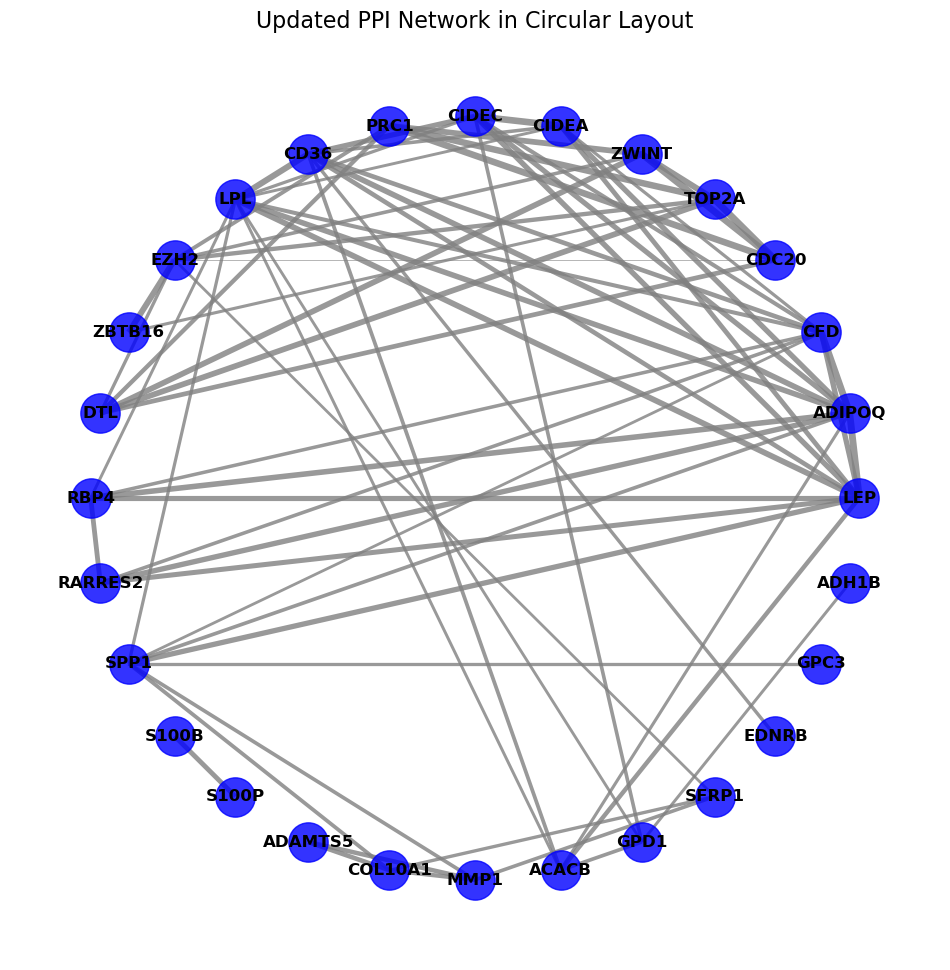


Options:
1. Remove a gene
2. Reduce interaction weight between genes
3. Show network statistics
4. Visualize network
5. Exit and save changes


Enter your choice (1-5):  3



**Updated Network Metrics**
Nodes: 28
Edges: 69
Avg. neighbors: 4.928571428571429
Diameter: inf
Radius: inf
Characteristic path length: inf
Clustering coefficient: 0.596655328798186
Density: 0.18253968253968253
Heterogeneity: 0.25544437904649797
Centralization: 0.37037037037037035
Connected components: 2

Options:
1. Remove a gene
2. Reduce interaction weight between genes
3. Show network statistics
4. Visualize network
5. Exit and save changes


In [ ]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

# Parameters for STRING API request
params = {
    "identifiers": "%0d".join(selected_genes),
    "species": 9606,  
    "network_type": "functional",  
    "required_score": 400,  
    "caller_identity": "python_script"
}

# Send API request
response = requests.get(STRING_API_URL, params=params)

# Process API response
if response.status_code == 200:
    interactions = response.json()
    print("Data successfully fetched from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert API response into a DataFrame
if interactions:
    df = pd.DataFrame(interactions)[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Create graph from interaction data
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Function to compute extended network metrics
def calculate_metrics(graph):
    """Calculates extended network statistics including diameter, density, and centralization."""
    if graph.number_of_nodes() == 0:
        return {"No nodes present": "Metrics cannot be computed"}

    is_connected = nx.is_connected(graph) if graph.number_of_nodes() > 1 else False

    metrics = {
        "Nodes": graph.number_of_nodes(),
        "Edges": graph.number_of_edges(),
        "Avg. neighbors": sum(dict(graph.degree()).values()) / graph.number_of_nodes() if graph.number_of_nodes() > 0 else 0,
        "Diameter": nx.diameter(graph) if is_connected else float('inf'),
        "Radius": nx.radius(graph) if is_connected else float('inf'),
        "Characteristic path length": nx.average_shortest_path_length(graph) if is_connected else float('inf'),
        "Clustering coefficient": nx.average_clustering(graph),
        "Density": nx.density(graph),
        "Heterogeneity": nx.degree_pearson_correlation_coefficient(graph) if graph.number_of_edges() > 0 else 0,
        "Centralization": max(dict(graph.degree()).values()) / (graph.number_of_nodes() - 1) if graph.number_of_nodes() > 1 else 0,
        "Connected components": nx.number_connected_components(graph)
    }
    
    return metrics

# Store original network metrics
original_metrics = calculate_metrics(G)

# Function to visualize networks in a circular layout
def plot_network(graph, title):
    pos = nx.circular_layout(graph)  # Circular Layout
    edge_weights = [(graph[u][v]['weight'] / 100) * 500 for u, v in graph.edges()]

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="blue", alpha=0.8)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold", font_color="black")
    nx.draw_networkx_edges(graph, pos, width=edge_weights, edge_color="gray", alpha=0.8)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Function for interactive modifications
def modify_network(graph):
    """
    Allows the user to remove genes and weaken edges interactively.
    """
    G_modified = graph.copy()

    while True:
        print("\nOptions:")
        print("1. Remove a gene")
        print("2. Reduce interaction weight between genes")
        print("3. Show network statistics")
        print("4. Visualize network")
        print("5. Exit and save changes")

        choice = input("Enter your choice (1-5): ").strip()

        if choice == "1":
            node_to_remove = input("Enter gene name to remove: ").strip()
            if node_to_remove in G_modified:
                G_modified.remove_node(node_to_remove)
                print(f" - Removed {node_to_remove} from the network.")
            else:
                print(" - Gene not found in the network.")

        elif choice == "2":
            node1 = input("Enter first gene in interaction: ").strip()
            node2 = input("Enter second gene in interaction: ").strip()
            if G_modified.has_edge(node1, node2):
                try:
                    factor = float(input("Enter reduction factor (0.1 to 1.0): "))
                    if 0.1 <= factor <= 1.0:
                        G_modified[node1][node2]['weight'] *= factor
                        print(f" - Reduced interaction strength between {node1} and {node2} by {factor * 100}%.")
                    else:
                        print(" - Invalid factor. Must be between 0.1 and 1.0.")
                except ValueError:
                    print(" - Invalid input. Enter a numeric value between 0.1 and 1.0.")
            else:
                print(" - No direct interaction found between these genes.")

        elif choice == "3":
            new_metrics = calculate_metrics(G_modified)
            print("\n**Updated Network Metrics**")
            for key, value in new_metrics.items():
                print(f"{key}: {value}")

        elif choice == "4":
            plot_network(G_modified, "Updated PPI Network in Circular Layout")

        elif choice == "5":
            print("Changes saved. Exiting modification mode.")
            return G_modified

        else:
            print("Invalid choice. Please enter a number between 1 and 5.")

# Apply user modifications
G_user_modified = modify_network(G)

# Compute post-modification network metrics
post_modification_metrics = calculate_metrics(G_user_modified)

# Print network metrics before and after modifications
print("\n**Original Network Metrics**")
for key, value in original_metrics.items():
    print(f"{key}: {value}")

print("\n**Updated Network Metrics**")
for key, value in post_modification_metrics.items():
    print(f"{key}: {value}")

# Visualize the final modified network in a circular layout
plot_network(G_user_modified, "Final Modified PPI Network in Circular Layout")


Data fetched successfully from STRING API.


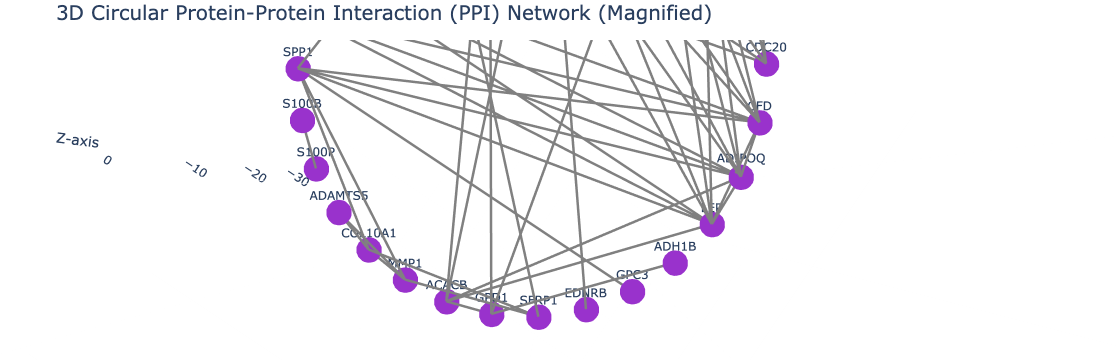

In [11]:
import requests
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# List of 28 genes from the pink network
selected_genes = [
    "ACACB", "ADAMTS5", "ADH1B", "ADIPOQ", "CD36", "CDC20", "CFD", "CIDEA", "CIDEC",
    "COL10A1", "DTL", "EDNRB", "EZH2", "GPC3", "GPD1", "LEP", "LPL", "MMP1", "PRC1", "RARRES2",
    "RBP4", "S100B", "S100P", "SFRP1", "SPP1", "TOP2A", "ZBTB16", "ZWINT"
]

# Define STRING API URL
STRING_API_URL = "https://string-db.org/api/json/network"

# Parameters for API request
params = {
    "identifiers": "%0d".join(selected_genes),  # Join genes with newlines for the API request
    "species": 9606,                            # Human species
    "network_type": "functional",               # Functional associations
    "required_score": 400,                      # Confidence threshold (400 = medium confidence)
    "caller_identity": "python_script"
}

# Send request to STRING API
response = requests.get(STRING_API_URL, params=params)

# Check response
if response.status_code == 200:
    interactions = response.json()
    print("Data fetched successfully from STRING API.")
else:
    print("Error fetching data from STRING API:", response.status_code)
    interactions = []

# Convert API response into a DataFrame and display top interactions
if interactions:
    df = pd.DataFrame(interactions)
    df = df[['preferredName_A', 'preferredName_B', 'score']]
    df = df.sort_values(by='score', ascending=False)
else:
    print("No interactions found.")
    df = pd.DataFrame(columns=['preferredName_A', 'preferredName_B', 'score'])

# Create a graph from interaction data
G = nx.Graph()

# Add edges from STRING interactions with weights
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=row["score"])

# Generate a larger 3D circular layout for better visibility
num_nodes = len(G.nodes())
theta = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)  # Evenly space around a circle

# Increase radius for better spacing
radius = 50  # Increased radius for better visibility
z_offset = np.sin(theta) * 5  # Increase depth variation for better 3D perspective

pos_3d = {}
for i, node in enumerate(G.nodes()):
    x = radius * np.cos(theta[i])
    y = radius * np.sin(theta[i])
    z = z_offset[i]
    pos_3d[node] = (x, y, z)

# Extract node and edge positions for visualization
edge_x, edge_y, edge_z = [], [], []
for edge in G.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

# Extract node positions
node_x, node_y, node_z = [], [], []
node_labels = []
for node in G.nodes():
    x, y, z = pos_3d[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_labels.append(node)

# Create edges as traces in Plotly
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=5, color='gray'),  # Increased width for better visibility
    hoverinfo='none',
    mode='lines'
)

# Create nodes as traces in Plotly
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(size=15, color='darkorchid', opacity=1),  # Increased node size
    text=node_labels,
    textposition="top center",
    hoverinfo="text"
)

# Create the figure
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="3D Circular Protein-Protein Interaction (PPI) Network (Magnified)",
        titlefont=dict(size=20),
        showlegend=False,
        hovermode='closest',
        margin=dict(l=0, r=0, b=0, t=40),
        scene=dict(
            xaxis=dict(title="X-axis", showbackground=False, range=[-60, 60]),  # Adjusted axis range for magnification
            yaxis=dict(title="Y-axis", showbackground=False, range=[-60, 60]),
            zaxis=dict(title="Z-axis", showbackground=False, range=[-30, 30]),
            camera=dict(
                eye=dict(x=0, y=-2, z=0.5)  # Adjust camera position to zoom in
            )
        )
    )
)

# Show the interactive 3D circular network graph
fig.show()
